# INFO7390 - Winning Rate of League of Legends
### Sun Rui (123997)   Li Jin (1234402)    Chai Yi (1226889)
### 4/20/18

## Abstract
Firstly, in this project, the team automatically collects information and datasets from Internet and find factors that can influence the match result after analysis.  
Next, A neural network model using Keras and TensorFlow to predict the winning rate for different champion selections are used to train a lot of match records users collected and tested the accuracy of the result. This model considered the champion selections in different areas (we called as blue team and red team) and different roles (top, jungle, mid, bottom, support). Not only the prediction of winning rate for one champion in the appointed team and role, but also the prediction the winning rate for a whole champion combination to fight with another one are realized in this machine learning process.  
At last, A GUI is provisioned so that the public are capable of conducting the operations like full draft evaluation, last pic analysis and partial draft analysis, which makes the whole application portable and accessible for general use.

# Introduction
League of Legends, which the author will refer it as “LOL” later, is an immensely popular multiplayer online battle arena game, with over 100 million monthly active users worldwide. It hosts competitions throughout the year and had 43 million viewers in the 2016 World Championships alone [1]. For those who haven't, here's a quick overview of the game itself.  
![title](photo/1.jpg)
Ten players are divided into two teams (blue or red) in the main LOL game (there are three modes). The objective for each team is to destroy the opposing teams "Nexus". Think of the Nexus as the main building in a base camp. Destroy the enemy Nexus and your team wins the game. Protect yours or your team loses the game. Simple enough. However, the collaboration often required between teammates to advance on the enemy Nexus, while defending its own, is wonderfully complex.  
It has an active and widespread competitive scene, and it is generally believed that the influence of champions selection to the match result becomes more and more important. However, it lacks a comprehensive and scientific theory applied in the process. Most of the champion selections are based on the past match experience. Thus, this project will use machine learning methods to figure out the important factors that influence match result and predict the result.  
Exploring this data set and see what team attributes are associated with a team winning would be an interesting process. There's a wealth of data in this file and it seems to be a solid exercise for general data wrangling to start, opportunities for visualizations throughout, and serves as a good primer to build and evaluate models that predict wins. 


## Data Analysis

In [1]:
from __future__ import print_function
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

df_raw = pd.read_csv('datasource/matches_cleaned.csv',sep=",")
df_raw = df_raw.drop(df_raw.columns[0], axis=1)
df_columns=pd.read_csv('datasource/columns.csv' ,sep=",")

In [2]:
df_raw.head()

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,golddiff,...,redMiddleChamp,goldredMiddle,redADC,redADCChamp,goldredADC,redSupport,redSupportChamp,goldredSupport,redBans,Address
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,"[0, 0, -14, -65, -268, -431, -488, -789, -494,...",...,Fizz,"[475, 475, 552, 842, 1178, 1378, 1635, 1949, 2...",Sneaky,Sivir,"[475, 475, 532, 762, 1097, 1469, 1726, 2112, 2...",LemonNation,Thresh,"[515, 515, 577, 722, 911, 1042, 1194, 1370, 14...","['Tristana', 'Leblanc', 'Nidalee']",http://matchhistory.na.leagueoflegends.com/en/...
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,"[0, 0, -26, -18, 147, 237, -152, 18, 88, -242,...",...,Azir,"[475, 475, 552, 786, 1097, 1389, 1660, 1955, 2...",CoreJJ,Corki,"[475, 475, 532, 868, 1220, 1445, 1732, 1979, 2...",KiWiKiD,Annie,"[515, 515, 583, 752, 900, 1066, 1236, 1417, 15...","['RekSai', 'Janna', 'Leblanc']",http://matchhistory.na.leagueoflegends.com/en/...
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,"[0, 0, 10, -60, 34, 37, 589, 1064, 1258, 913, ...",...,Azir,"[475, 475, 533, 801, 1006, 1233, 1385, 1720, 1...",Cop,Corki,"[475, 475, 533, 781, 1085, 1398, 1782, 1957, 2...",BunnyFuFuu,Janna,"[515, 515, 584, 721, 858, 1002, 1168, 1303, 14...","['Leblanc', 'Zed', 'RekSai']",http://matchhistory.na.leagueoflegends.com/en/...
3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,"[0, 0, -15, 25, 228, -6, -243, 175, -346, 16, ...",...,Lulu,"[475, 475, 532, 771, 1046, 1288, 1534, 1776, 2...",KEITH,KogMaw,"[475, 475, 532, 766, 1161, 1438, 1776, 1936, 2...",Xpecial,Janna,"[515, 515, 583, 721, 870, 1059, 1205, 1342, 15...","['RekSai', 'Rumble', 'LeeSin']",http://matchhistory.na.leagueoflegends.com/en/...
4,NALCS,2015,Spring,Season,CLG,1,0,T8,35,"[40, 40, 44, -36, 113, 158, -121, -191, 23, 20...",...,Lulu,"[475, 475, 532, 807, 1042, 1338, 1646, 1951, 2...",Maplestreet8,Corki,"[475, 475, 532, 792, 1187, 1488, 1832, 2136, 2...",Dodo8,Annie,"[475, 475, 538, 671, 817, 948, 1104, 1240, 136...","['Rumble', 'Sivir', 'Rengar']",http://matchhistory.na.leagueoflegends.com/en/...


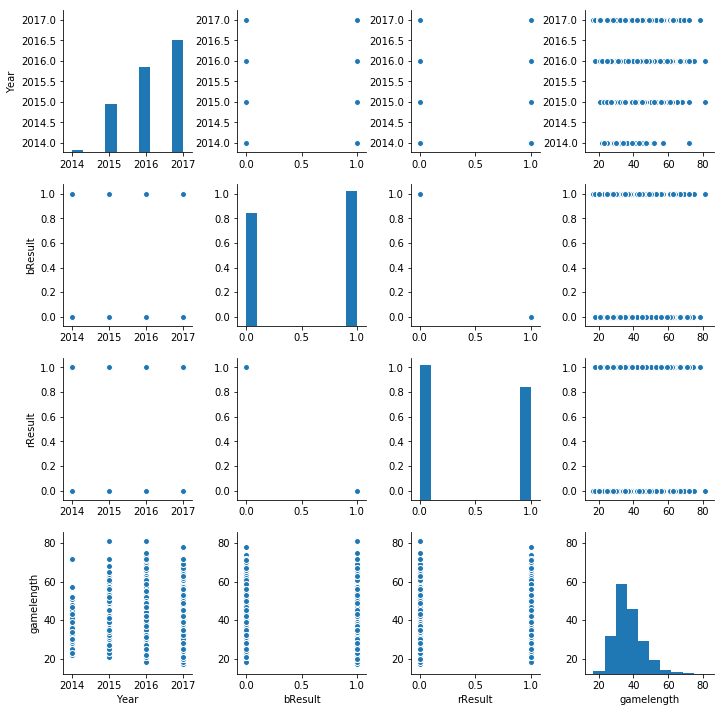

In [3]:
sns.pairplot(df_raw)
plt.rcParams['figure.figsize'] = (10,6)

In [4]:
df = df_raw.copy(deep=True)
df['win_team'] = np.where(df['bResult']==1, 'blue', 'red')
df[['win_team', 'bResult', 'rResult']].head()

,win_team,bResult,rResult
0,blue,1,0
1,red,0,1
2,blue,1,0
3,red,0,1
4,blue,1,0


## Game Lenth Distrubution

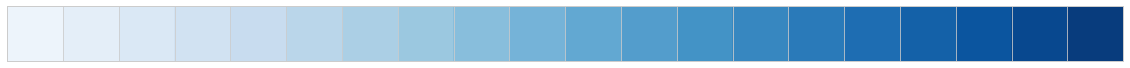

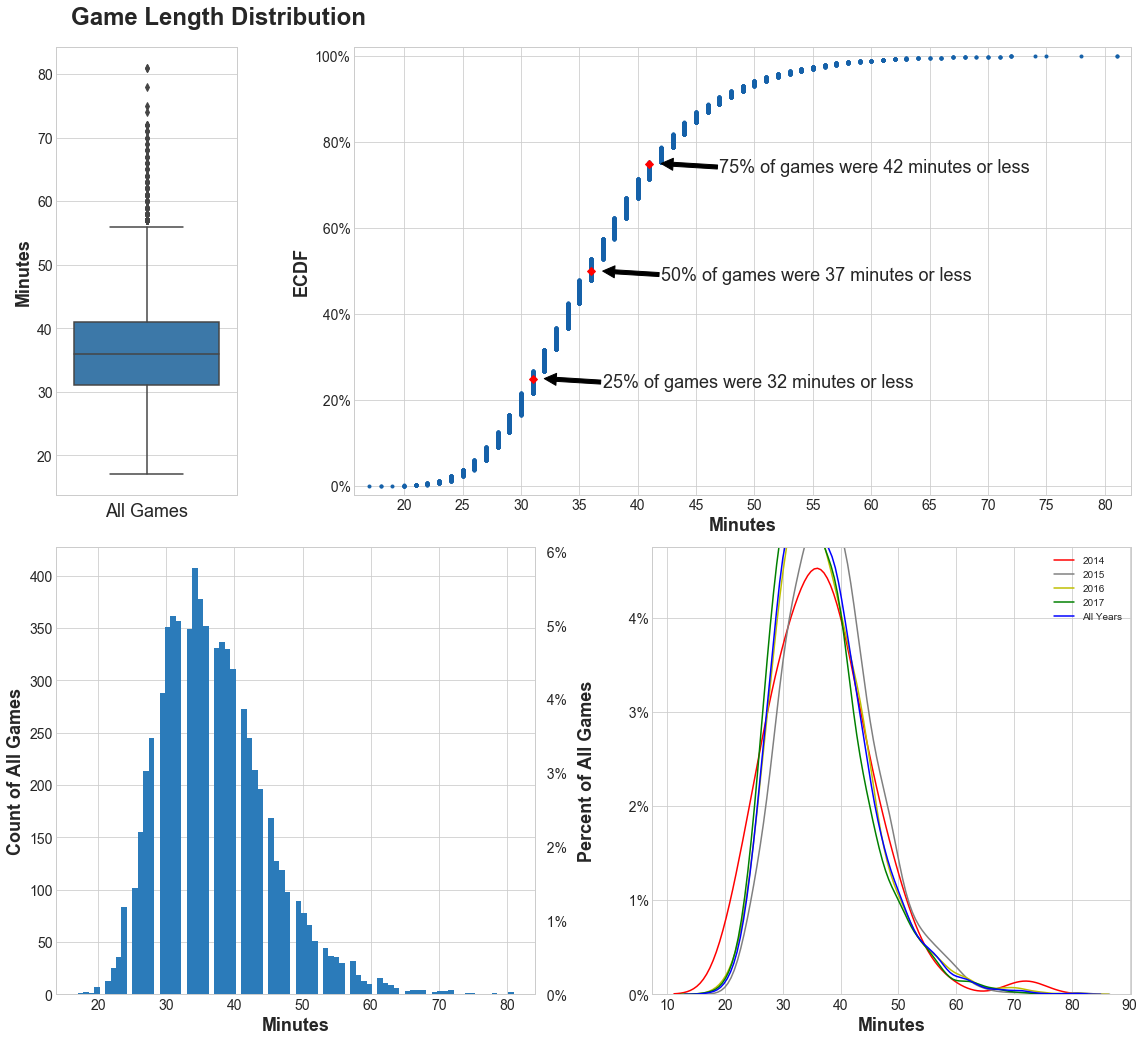

In [5]:
# Setstyle options
sns.set_style('whitegrid')
sns.palplot(sns.color_palette('Blues', 20))
colors = sns.color_palette('Blues', 20)

# Create Figure
fig, ax = plt.subplots(2,4, figsize=(16,14))
fig.suptitle('Game Length Distribution', x=0.065, y=1.03, fontsize=24, fontweight='bold', 
             horizontalalignment='left')
fig.subplots_adjust(top=0.9)

percentiles = np.array([25, 50, 75])
ptiles_gl = np.percentile(df['gamelength'], percentiles)

# Create Subplots

# 1 Box and Whisker
p1 = plt.subplot2grid((2,4), (0,0), colspan=1)
sns.boxplot(y=df['gamelength'], color=colors[14])
# Swarm plot adds no value here, ignore below
# sns.swarmplot(y=df['gamelength'], color=colors[2])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('All Games', fontsize=18)
plt.ylabel('Minutes', fontsize = 18, fontweight = 'bold')

# 2 ECDF Plot
p2 = plt.subplot2grid((2,4), (0,1), colspan=3)
x = np.sort(df['gamelength'])
y = np.arange(1, len(x) + 1) / len(x)
plt.plot(x,y, marker='.', linestyle='none', color=colors[16])
plt.plot(ptiles_gl, percentiles/100, marker='D', color='red', linestyle='none')

# 2 ECDF Formatting (a lot)
yvals = p2.get_yticks()
p2.set_yticklabels(['{:3.0f}%'.format(y*100) for y in yvals])
plt.yticks(fontsize=14)
plt.xticks(np.arange(0, 85, 5), fontsize=14)
plt.xlabel('Minutes', fontsize=18, fontweight = 'bold')
plt.ylabel('ECDF', fontsize=18, fontweight='bold')
plt.margins(0.02)

plt.annotate('25% of games were 32 minutes or less', xy=(32, .25), xytext=(37, .23), fontsize=18, 
             arrowprops=dict(facecolor='black'))
plt.annotate('50% of games were 37 minutes or less', xy=(37, .5), xytext=(42, .48), 
             fontsize=18, arrowprops=dict(facecolor='black'))
plt.annotate('75% of games were 42 minutes or less', xy=(42, .75), xytext=(47, .73), fontsize=18, 
             arrowprops=dict(facecolor='black'))

# 3 Histogram Count
p3 = plt.subplot2grid((2,4), (1,0), colspan=2)
plt.hist(x='gamelength', bins=80, data=df, color=colors[14])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Minutes', fontweight = 'bold', fontsize = 18)
plt.ylabel('Count of All Games', fontsize=18, fontweight='bold')

# 3 Histogram Percentage - Second Y Axis for Percent (To DO - align Y2 ytick values to Y1 ytick lines)
weights = np.ones_like(df['gamelength']) / len(df['gamelength'])
p3 = plt.twinx()
plt.hist(x='gamelength', bins=80, weights= weights, data=df, color=colors[14])
yvals = p3.get_yticks()
p3.set_yticklabels(['{:3.0f}%'.format(y*100) for y in yvals])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
p3.grid(b=False)

# 4 Distribution Plot across Years
p4 = plt.subplot2grid((2,4), (1,2), colspan=2)
sns.distplot((df['gamelength'][df['Year']==2014]), hist=False, color='r', label='2014')
sns.distplot((df['gamelength'][df['Year']==2015]), hist=False, color='grey', label='2015')
sns.distplot((df['gamelength'][df['Year']==2016]), hist=False, color='y', label='2016')
sns.distplot((df['gamelength'][df['Year']==2017]), hist=False, color='g', label='2017')
sns.distplot((df['gamelength']), hist=False, color='b', label='All Years')
# Formatting
yvals = p4.get_yticks()
p4.set_yticklabels(['{:3.0f}%'.format(y*100) for y in yvals])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Percent of All Games\n', fontsize=18, fontweight='bold')
plt.xlabel('Minutes', fontsize = 18, fontweight = 'bold')

# Show everything
plt.tight_layout()
plt.show()

## Wins (Dependent Variable)

In [6]:
pvt_wins_y = df.pivot_table(index = 'Year', values = ['bResult', 'rResult'], aggfunc = np.sum,  
                                margins = False)
pvt_wins_y['b_net_wins'] = pvt_wins_y['bResult'] - pvt_wins_y['rResult']
pvt_wins_y['b_win_pcnt'] = pvt_wins_y['bResult'] / (pvt_wins_y['bResult'] + pvt_wins_y['rResult'])
pvt_wins_y['b_pcnt_diff'] = pvt_wins_y['b_win_pcnt'] -.5
pvt_wins_y

,bResult,rResult,b_net_wins,b_win_pcnt,b_pcnt_diff
Year,,,,,
2014,46,32,14,0.589744,0.089744
2015,748,616,132,0.548387,0.048387
2016,1273,1148,125,0.525816,0.025816
2017,1775,1415,360,0.556426,0.056426


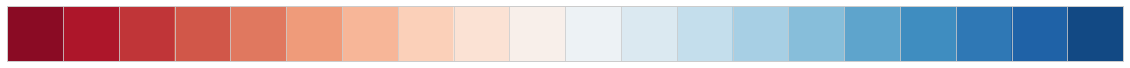

In [7]:
sns.palplot(sns.color_palette('RdBu', 20))

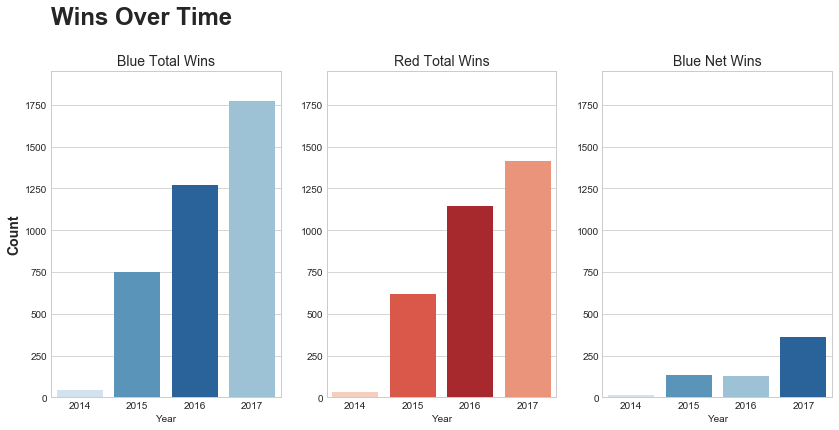

In [8]:
# Set plot styles and colors
blues = sns.color_palette('Blues', 4)
reds = sns.color_palette('Reds', 4)

# Control y 
y_max = 1.1 * max(max(pvt_wins_y['bResult']), max(pvt_wins_y['rResult']))

fig, axes = plt.subplots(1,3, figsize=(14,6))
fig.suptitle('Wins Over Time', x=0.125, y=1.03, fontsize=24, fontweight='bold', 
             horizontalalignment='left')

# Blue Total Wins Plot
plt.subplot(1,3,1)
sns.barplot(x=pvt_wins_y.index, y='bResult', data = pvt_wins_y, palette=[blues[0], blues[2], blues[3], blues[1]])
plt.title('Blue Total Wins', fontsize=14)
plt.ylim(0, y_max)
plt.ylabel('Count', fontsize = 14, fontweight = 'bold')

# Red Total Wins Plot
plt.subplot(1,3,2)
sns.barplot(x=pvt_wins_y.index, y='rResult', data = pvt_wins_y, palette=[reds[0], reds[2], reds[3], reds[1]])
plt.title('Red Total Wins', fontsize=14)
plt.ylim(0, y_max)
plt.ylabel('')

# Blue Net Wins Plot
plt.subplot(1,3,3)
sns.barplot(x=pvt_wins_y.index, y='b_net_wins', data = pvt_wins_y, palette=[blues[0], blues[2], blues[1], blues[3]])
plt.title('Blue Net Wins', fontsize=14)
plt.ylim(0, y_max)
plt.ylabel('')

plt.show()

We find that BLue Side has more win than Right Side

Later, we will discussion the reason

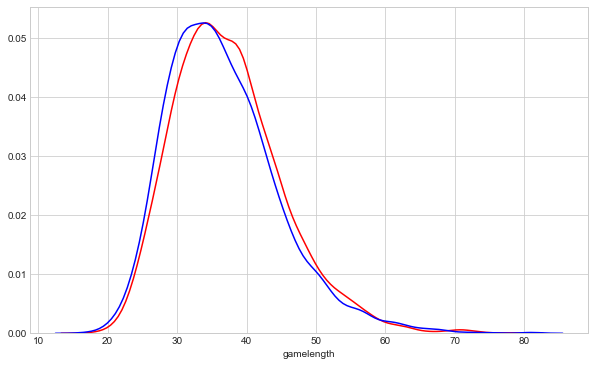

In [9]:
redWins = df[df.rResult == 1]
blueWins = df[df.bResult == 1]

sns.distplot(redWins.gamelength, color='red', hist=False)
sns.distplot(blueWins.gamelength, color='blue', hist=False)

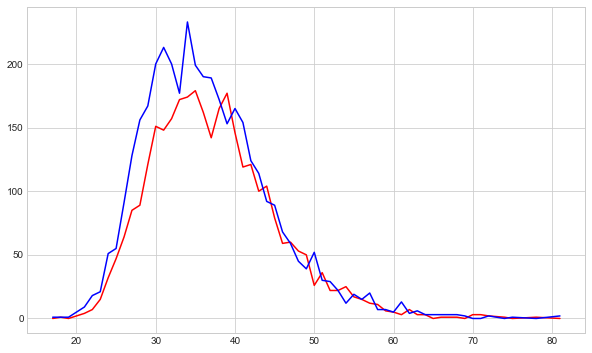

In [10]:
redWinsLength = df.groupby('gamelength').rResult.sum()
blueWinsLength = df.groupby('gamelength').bResult.sum()

plt.plot(redWinsLength.index, redWinsLength, 'r-')
plt.plot(blueWinsLength.index, blueWinsLength, 'b-')

Creating a graph of the number of wins for each side by minute one can see that the significant advantage for blue comes before approximately the 40th minute mark after which the playing field seems to be even.

clean the data

In [11]:
from ast import literal_eval
df['golddiff'] = df['golddiff'].apply(literal_eval)

# Check to make sure function works correctly
print(type(df['golddiff'][0]))
print(df['golddiff'][0])

<class 'list'>
[0, 0, -14, -65, -268, -431, -488, -789, -494, -625, -1044, -313, -760, -697, -790, -611, 240, 845, 797, 1422, 987, 169, 432, 491, 1205, 1527, 1647, 1847, 3750, 4719, 3561, 3367, 2886, 2906, 4411, 4473, 4639, 4762, 4686, 6057]


In [12]:
# Transform all other columns containing pseudo lists to real lists
df['goldblue'] = df['goldblue'].apply(literal_eval)
df['bKills'] = df['bKills'].apply(literal_eval)
df['bTowers'] = df['bTowers'].apply(literal_eval)
df['bInhibs'] = df['bInhibs'].apply(literal_eval)
df['bDragons'] = df['bDragons'].apply(literal_eval)
df['bBarons'] = df['bBarons'].apply(literal_eval)
df['bHeralds'] = df['bHeralds'].apply(literal_eval)

df['goldred'] = df['goldred'].apply(literal_eval)
df['rKills'] = df['rKills'].apply(literal_eval)
df['rTowers'] = df['rTowers'].apply(literal_eval)
df['rInhibs'] = df['rInhibs'].apply(literal_eval)
df['rDragons'] = df['rDragons'].apply(literal_eval)
df['rBarons'] = df['rBarons'].apply(literal_eval)
df['rHeralds'] = df['rHeralds'].apply(literal_eval)

df['goldblueTop'] = df['goldblueTop'].apply(literal_eval)
df['goldblueJungle'] = df['goldblueJungle'].apply(literal_eval)
df['goldblueMiddle'] = df['goldblueMiddle'].apply(literal_eval)
df['goldblueADC'] = df['goldblueADC'].apply(literal_eval)
df['goldblueSupport'] = df['goldblueSupport'].apply(literal_eval)

df['goldredTop'] = df['goldredTop'].apply(literal_eval)
df['goldredJungle'] = df['goldredJungle'].apply(literal_eval)
df['goldredMiddle'] = df['goldredMiddle'].apply(literal_eval)
df['goldredADC'] = df['goldredADC'].apply(literal_eval)
df['goldredSupport'] = df['goldredSupport'].apply(literal_eval)

## Gold Attributes

My main goal in the sections below is to create a time series for teams that win vs those that lose. The data frame isn't currently tailored in a way that lets us see this easily, so we'll make a few changes below. The immediate task is to reformat the gold values by minute in the goldblue and goldred columns, identify whether that particular gold value belongs to a winning or losing team, and visualizing all of it for any quick observations.

In [13]:
dct_win_team = dict(zip(df.index, df['win_team']))

In [14]:
df[['goldblue', 'goldred']].head()

,goldblue,goldred
0,"[2415, 2415, 2711, 3887, 5068, 6171, 7412, 866...","[2415, 2415, 2725, 3952, 5336, 6602, 7900, 945..."
1,"[2415, 2415, 2705, 4108, 5511, 6797, 7637, 895...","[2415, 2415, 2731, 4126, 5364, 6560, 7789, 893..."
2,"[2415, 2415, 2726, 3794, 4933, 6236, 8109, 965...","[2415, 2415, 2716, 3854, 4899, 6199, 7520, 859..."
3,"[2415, 2415, 2705, 3847, 5398, 6473, 7720, 930...","[2415, 2415, 2720, 3822, 5170, 6479, 7963, 913..."
4,"[2415, 2415, 2710, 3950, 5404, 6666, 7887, 913...","[2375, 2375, 2666, 3986, 5291, 6508, 8008, 932..."


Transformation 1 of 2

In [15]:
# Unstack df to dfu, reformatting data to have minutes along columns
df_gold = df[['goldblue', 'goldred']].unstack().apply(pd.Series)

# Map Level 1 to dct_win_team
df_gold['win_team'] = (df_gold.index.get_level_values(1))
df_gold['win_team'] = df_gold['win_team'].map(dct_win_team)
df_gold.head()

0       1       2       3       4       5       6       7  \
goldblue 0  2415.0  2415.0  2711.0  3887.0  5068.0  6171.0  7412.0  8661.0   
         1  2415.0  2415.0  2705.0  4108.0  5511.0  6797.0  7637.0  8953.0   
         2  2415.0  2415.0  2726.0  3794.0  4933.0  6236.0  8109.0  9656.0   
         3  2415.0  2415.0  2705.0  3847.0  5398.0  6473.0  7720.0  9308.0   
         4  2415.0  2415.0  2710.0  3950.0  5404.0  6666.0  7887.0  9131.0   

                  8        9    ...     72  73  74  75  76  77  78  79  80  \
goldblue 0  10154.0  11361.0    ...    NaN NaN NaN NaN NaN NaN NaN NaN NaN   
         1  10183.0  11419.0    ...    NaN NaN NaN NaN NaN NaN NaN NaN NaN   
         2  11073.0  12374.0    ...    NaN NaN NaN NaN NaN NaN NaN NaN NaN   
         3  10547.0  12033.0    ...    NaN NaN NaN NaN NaN NaN NaN NaN NaN   
         4  10646.0  11943.0    ...    NaN NaN NaN NaN NaN NaN NaN NaN NaN   

            win_team  
goldblue 0      blue  
         1       red  
         2      blue  
         3       red  
         4      blue  

[5 rows x 82 columns]

In [16]:
# Transform "variable" index to column
df_gold = df_gold.reset_index(level=0, drop=False)
df_gold = df_gold.rename(columns={'level_0':'variable'})
df_gold.head()

,variable,0,1,2,3,4,5,6,7,8,...,72,73,74,75,76,77,78,79,80,win_team
0,goldblue,2415.0,2415.0,2711.0,3887.0,5068.0,6171.0,7412.0,8661.0,10154.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,blue
1,goldblue,2415.0,2415.0,2705.0,4108.0,5511.0,6797.0,7637.0,8953.0,10183.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,red
2,goldblue,2415.0,2415.0,2726.0,3794.0,4933.0,6236.0,8109.0,9656.0,11073.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,blue
3,goldblue,2415.0,2415.0,2705.0,3847.0,5398.0,6473.0,7720.0,9308.0,10547.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,red
4,goldblue,2415.0,2415.0,2710.0,3950.0,5404.0,6666.0,7887.0,9131.0,10646.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,blue


In [17]:
# Reformat dataframe to transform minute columns to a single column with the minute value within it through pd.melt
melt_gold = pd.melt(df_gold, ['variable', 'win_team'], var_name='minute')
print(melt_gold.shape)
melt_gold.head()

(1142586, 4)


,variable,win_team,minute,value
0,goldblue,blue,0,2415.0
1,goldblue,red,0,2415.0
2,goldblue,blue,0,2415.0
3,goldblue,red,0,2415.0
4,goldblue,blue,0,2415.0


In [18]:
melt_gold['var_color'] = np.where(melt_gold['variable']=='goldblue', 'blue', 'red')
melt_gold['win'] = 'no'
melt_gold.loc[((melt_gold['var_color']=='blue') & (melt_gold['win_team']=='blue')) |
             ((melt_gold['var_color']=='red') & (melt_gold['win_team']=='red')), 
              'win'] = 'yes'
melt_gold.head()

,variable,win_team,minute,value,var_color,win
0,goldblue,blue,0,2415.0,blue,yes
1,goldblue,red,0,2415.0,blue,no
2,goldblue,blue,0,2415.0,blue,yes
3,goldblue,red,0,2415.0,blue,no
4,goldblue,blue,0,2415.0,blue,yes


In [19]:
melt_gold.shape

(1142586, 6)

In [20]:
# Check that wins for blue 
melt_gold[(melt_gold['win']=='no') & (melt_gold['win_team']=='blue')].head()

,variable,win_team,minute,value,var_color,win
7053,goldred,blue,0,2415.0,red,no
7055,goldred,blue,0,2415.0,red,no
7057,goldred,blue,0,2375.0,red,no
7059,goldred,blue,0,2415.0,red,no
7060,goldred,blue,0,2415.0,red,no


In [21]:
melt_gold[(melt_gold['win']=='no') & (melt_gold['win_team']=='red')].head()

,variable,win_team,minute,value,var_color,win
1,goldblue,red,0,2415.0,blue,no
3,goldblue,red,0,2415.0,blue,no
5,goldblue,red,0,2415.0,blue,no
8,goldblue,red,0,2415.0,blue,no
13,goldblue,red,0,2415.0,blue,no


In [22]:
melt_gold.pivot_table(index=['win_team'], values=['win'], aggfunc='count', margins=True)

,win
win_team,
blue,622404.0
red,520182.0
All,1142586.0


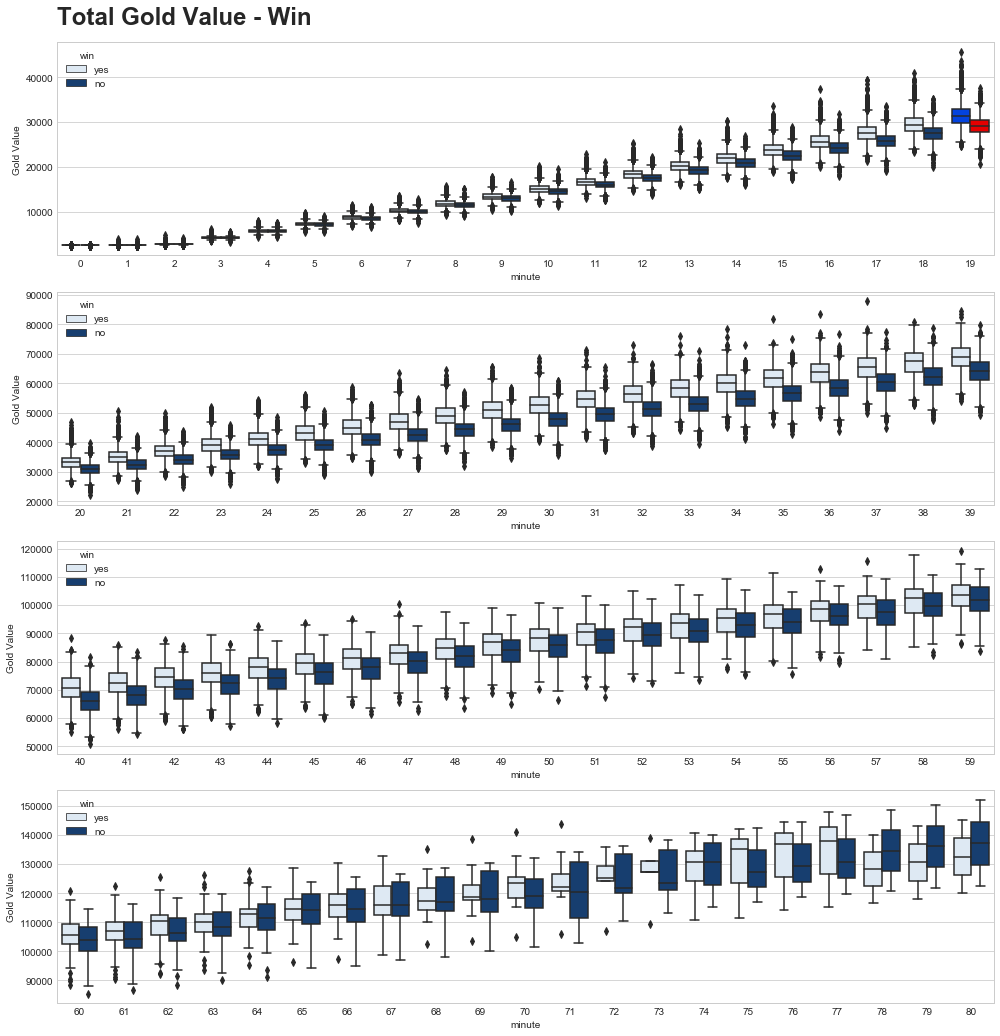

In [23]:
# Create pal dictionary using comprehension
pal = {win: colors[2] if win =='yes' else colors[19] for win in melt_gold.win.unique()}

fig, ax = plt.subplots(4,1, figsize=(14,14))
fig.suptitle('Total Gold Value - Win', fontsize=24, fontweight='bold', x=0.06, y=1.025, horizontalalignment='left')
fig.subplots_adjust(top=0.85)

plt.subplot(4,1,1)
p1 = sns.boxplot(x='minute', y='value', hue='win', data = melt_gold[melt_gold['minute']<20], 
                 palette=pal)
box = p1.artists[38] # artists allow you to access the box appearance properties of the box you want to highlight
box.set_facecolor(sns.xkcd_rgb['blue'])
box = p1.artists[39] # artists allow you to access the box appearance properties of the box you want to highlight
box.set_facecolor(sns.xkcd_rgb['red'])
plt.ylabel('Gold Value')

plt.subplot(4,1,2)
ax = sns.boxplot(x='minute', y='value', hue='win', data = melt_gold[(melt_gold['minute']>=20) & ((melt_gold['minute'] <40))],
                palette = pal)
plt.ylabel('Gold Value')

plt.subplot(4,1,3)
sns.boxplot(x='minute', y='value', hue='win', data = melt_gold[(melt_gold['minute']>=40) & ((melt_gold['minute']<60))], 
            palette=pal)
plt.ylabel('Gold Value')

plt.subplot(4,1,4)
sns.boxplot(x='minute', y='value', hue='win', data = melt_gold[(melt_gold['minute']>=60)], 
            palette=pal)
plt.ylabel('Gold Value')

plt.tight_layout()
plt.show()

## Kills Attributes

In [24]:
killData = pd.read_csv('datasource/kills.csv')
killData.head()

,Address,Team,Time,Victim,Killer,Assist_1,Assist_2,Assist_3,Assist_4,x_pos,y_pos
0,http://matchhistory.na.leagueoflegends.com/en/...,bKills,10.820,C9 Hai,TSM Bjergsen,NaN,NaN,NaN,NaN,9229,8469
1,http://matchhistory.na.leagueoflegends.com/en/...,bKills,16.286,C9 LemonNation,TSM WildTurtle,TSM Santorin,TSM Bjergsen,TSM Lustboy,NaN,13908,5960
2,http://matchhistory.na.leagueoflegends.com/en/...,bKills,18.733,C9 Hai,TSM Bjergsen,TSM Santorin,TSM WildTurtle,TSM Lustboy,NaN,8281,7889
3,http://matchhistory.na.leagueoflegends.com/en/...,bKills,18.880,C9 Meteos,TSM Dyrus,TSM Santorin,TSM Bjergsen,TSM WildTurtle,TSM Lustboy,8522,8895
4,http://matchhistory.na.leagueoflegends.com/en/...,bKills,27.005,C9 Balls,TSM Bjergsen,TSM Dyrus,TSM Santorin,TSM WildTurtle,TSM Lustboy,8902,7643


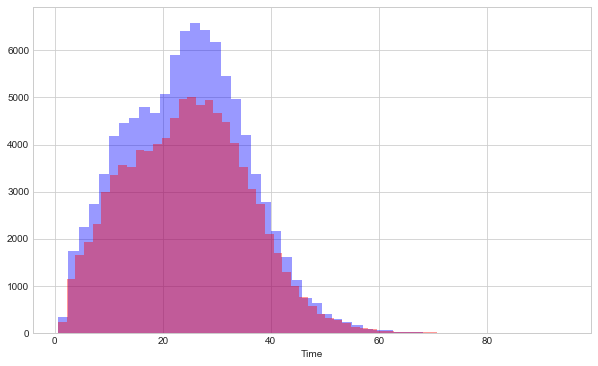

In [25]:
blueDeaths = killData[killData.Team == 'bKills']
redDeaths = killData[killData.Team == 'rKills']
blueDeaths = blueDeaths[blueDeaths.Time.notnull()]
redDeaths = redDeaths[redDeaths.Time.notnull()]

sns.distplot(blueDeaths.Time, kde=False, color='blue')
sns.distplot(redDeaths.Time, kde=False, color='red')

Blue starts to have an increase in kills over read around the twenty to thirty mark. That still doesn't answer what causes this reaction only that there is a surge in blues ability to kill.

In [26]:
df[['bKills', 'rKills']].head()

,bKills,rKills
0,"[[10.82, C9 Hai, TSM Bjergsen, [], 9229, 8469]...","[[16.529, TSM Lustboy, C9 Balls, [C9 Meteos, C..."
1,"[[11.104, DIG Shiphtur, CST Jesiz, [CST Impale...","[[12.387, CST Jesiz, DIG Gamsu, [DIG Shiphtur]..."
2,"[[5.255, GV Keane, WFX Pobelter, [WFX ShorterA...","[[8.449, WFX Altec, GV Cop, [GV BunnyFuFuu], 1..."
3,"[[8.274, TL Quas, TIP Rhux, [TIP Apollo], 3491...","[[7.768, TIP Rush, TL IWDominate, [TL Fenix], ..."
4,"[[11.438, T8 Dodo8, CLG Doublelift, [CLG Xmith...","[[11.988, CLG Doublelift, T8 Porpoise8, [T8 Sl..."


In [27]:
# Creating function to only extract  minutelist
def extract_minutes(item):
    """Extract minute list from bKills or rKills column"""
    try:
        return[item[0] for item in item]
    except:
        return[0 for item in item] # to account for empty lists

In [28]:
# Apply function to new Kills columns
df['bKills_min'] = df['bKills'].apply(extract_minutes)
df['rKills_min'] = df['rKills'].apply(extract_minutes)
df[['bKills', 'bKills_min', 'rKills', 'rKills_min']].head()

,bKills,bKills_min,rKills,rKills_min
0,"[[10.82, C9 Hai, TSM Bjergsen, [], 9229, 8469]...","[10.82, 16.286, 18.733, 18.88, 27.005, 27.029,...","[[16.529, TSM Lustboy, C9 Balls, [C9 Meteos, C...","[16.529, 16.791, 18.784, 27.073, 29.983, 30.11..."
1,"[[11.104, DIG Shiphtur, CST Jesiz, [CST Impale...","[11.104, 12.332, 12.392, 12.665, 14.837, 25.00...","[[12.387, CST Jesiz, DIG Gamsu, [DIG Shiphtur]...","[12.387, 12.689, 14.882, 25.119, 26.214, 29.35..."
2,"[[5.255, GV Keane, WFX Pobelter, [WFX ShorterA...","[5.255, 6.351, 10.628, 12.281, 12.747, 12.979,...","[[8.449, WFX Altec, GV Cop, [GV BunnyFuFuu], 1...","[8.449, 12.91, 14.23, 17.885, 19.513, 19.64, 2..."
3,"[[8.274, TL Quas, TIP Rhux, [TIP Apollo], 3491...","[8.274, 12.002, 19.12, 19.23, 19.298, 26.473, ...","[[7.768, TIP Rush, TL IWDominate, [TL Fenix], ...","[7.768, 9.681, 12.03, 13.904, 17.729, 21.026, ..."
4,"[[11.438, T8 Dodo8, CLG Doublelift, [CLG Xmith...","[11.438, 24.766, 24.844, 25.231, 25.251, 25.28...","[[11.988, CLG Doublelift, T8 Porpoise8, [T8 Sl...","[11.988, 21.451, 21.636, 24.873, 25.108, 25.21..."


In [29]:
df[['bKills', 'bKills_min', 'rKills', 'rKills_min']].shape

(7053, 4)

In [30]:
# Check to make sure function applied correctly

# First row, 3rd sublist, 0 position
print(df['bKills'][0][3][0])
# First row, 3rd value
print(df['bKills_min'][0][3])

# 125th row, 10th sublist, 0 position
print(df['bKills'][125][10][0])
# 125th row, 3rd value
print(df['bKills_min'][125][10])

18.88
18.88
29.149
29.149


Sweet. Our extract_minutes function correctly applied to the bKills and rKills columns to create bKills_min and rKills_min. I'm going to ultimately want plot kills on a time series basis and see their distributions by specific game, split into winners vs losers.

In [31]:
# Identify unique game ID in gameHash
print(df['Address'][1023])
print(df['Address'][1023][-16:])

http://matchhistory.na.leagueoflegends.com/en/#match-details/TRLH1/1002290126?gameHash=7090a104f0aa16f1
7090a104f0aa16f1


In [32]:
pd.unique(df['League'])

array(['NALCS', 'EULCS', 'LCK', 'LMS', 'CBLoL', 'TCL', 'OPL', 'CLS', 'LLN',
       'LJL', 'LCL', 'WC', 'MSI', 'IEM', 'RR'], dtype=object)

In [33]:
df['LA'] = df['League']
print(pd.unique(df['LA']))
df[['League', 'LA']].head()

['NALCS' 'EULCS' 'LCK' 'LMS' 'CBLoL' 'TCL' 'OPL' 'CLS' 'LLN' 'LJL' 'LCL'
 'WC' 'MSI' 'IEM' 'RR']


,League,LA
0,NALCS,NALCS
1,NALCS,NALCS
2,NALCS,NALCS
3,NALCS,NALCS
4,NALCS,NALCS


In [34]:
# Extract and gameID from df['MatchHistory]
gameIDs = []

for row in df['Address']:
    # Take 16 characters from end of MatchHistory and append to gameIDs
    gameIDs.append(row[-16:])

df['gameID'] = gameIDs
df['gameID'] = df['LA'] + '-' + df['gameID']

dct_index_gameID = dict(zip(df.index, df['gameID']))
dct_gameID_win = dict(zip(df['gameID'], df['win_team']))

df[['Address', 'gameID', 'win_team', 'bKills_min', 'rKills_min']].head()

,Address,gameID,win_team,bKills_min,rKills_min
0,http://matchhistory.na.leagueoflegends.com/en/...,NALCS-fbb300951ad8327c,blue,"[10.82, 16.286, 18.733, 18.88, 27.005, 27.029,...","[16.529, 16.791, 18.784, 27.073, 29.983, 30.11..."
1,http://matchhistory.na.leagueoflegends.com/en/...,NALCS-055b17da8456fdc8,red,"[11.104, 12.332, 12.392, 12.665, 14.837, 25.00...","[12.387, 12.689, 14.882, 25.119, 26.214, 29.35..."
2,http://matchhistory.na.leagueoflegends.com/en/...,NALCS-8e8a9b58df366e2d,blue,"[5.255, 6.351, 10.628, 12.281, 12.747, 12.979,...","[8.449, 12.91, 14.23, 17.885, 19.513, 19.64, 2..."
3,http://matchhistory.na.leagueoflegends.com/en/...,NALCS-0ed1cd0e0e57329c,red,"[8.274, 12.002, 19.12, 19.23, 19.298, 26.473, ...","[7.768, 9.681, 12.03, 13.904, 17.729, 21.026, ..."
4,http://matchhistory.na.leagueoflegends.com/en/...,NALCS-f932becf86175f38,blue,"[11.438, 24.766, 24.844, 25.231, 25.251, 25.28...","[11.988, 21.451, 21.636, 24.873, 25.108, 25.21..."


In [35]:
df_kills = df[['bKills_min', 'rKills_min']].unstack().apply(pd.Series)
df_kills.tail()

0       1       2       3          4       5       6   \
rKills_min 7048   9.513  14.160  31.495  33.744  33.801000     NaN     NaN   
           7049   6.622  16.113  17.815  20.549  20.672000  20.795  24.331   
           7050   5.006   8.828   9.500  12.205  12.269000  12.338  14.826   
           7051  18.290  19.174  19.258  20.360   0.733333     NaN     NaN   
           7052  11.849  18.742  18.766  18.898  21.253000  26.236  26.498   

                     7       8       9  ...  61  62  63  64  65  66  67  68  \
rKills_min 7048     NaN     NaN     NaN ... NaN NaN NaN NaN NaN NaN NaN NaN   
           7049  34.769  37.844  38.184 ... NaN NaN NaN NaN NaN NaN NaN NaN   
           7050  17.488  17.491  17.654 ... NaN NaN NaN NaN NaN NaN NaN NaN   
           7051     NaN     NaN     NaN ... NaN NaN NaN NaN NaN NaN NaN NaN   
           7052  31.003     NaN     NaN ... NaN NaN NaN NaN NaN NaN NaN NaN   

                 69  70  
rKills_min 7048 NaN NaN  
           7049 NaN NaN  
           7050 NaN NaN  
           7051 NaN NaN  
           7052 NaN NaN  

[5 rows x 71 columns]

In [36]:
# Map Level 1 index to dct_index_gameID and dct_win_team
df_kills['gameID'] = (df_kills.index.get_level_values(1))
df_kills['gameID'] = df_kills['gameID'].map(dct_index_gameID)

df_kills['win_team'] = (df_kills.index.get_level_values(1))
df_kills['win_team'] = df_kills['gameID'].map(dct_gameID_win)

# Transform "variable" index to column
df_kills = df_kills.reset_index(level=0, drop=False)
df_kills = df_kills.rename(columns={'level_0':'variable'})
df_kills.head()

,variable,0,1,2,3,4,5,6,7,8,...,63,64,65,66,67,68,69,70,gameID,win_team
0,bKills_min,10.820,16.286,18.733,18.880,27.005,27.029,27.109,28.989,29.073,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NALCS-fbb300951ad8327c,blue
1,bKills_min,11.104,12.332,12.392,12.665,14.837,25.008,25.134,28.412,30.128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NALCS-055b17da8456fdc8,red
2,bKills_min,5.255,6.351,10.628,12.281,12.747,12.979,12.992,14.247,17.777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NALCS-8e8a9b58df366e2d,blue
3,bKills_min,8.274,12.002,19.120,19.230,19.298,26.473,29.102,36.557,37.052,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NALCS-0ed1cd0e0e57329c,red
4,bKills_min,11.438,24.766,24.844,25.231,25.251,25.289,26.685,26.719,28.002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NALCS-f932becf86175f38,blue


In [37]:
# Reformat dataframe to transform columns (kill number) to a single column with the minute value within it through pd.melt
melt_kills = pd.melt(df_kills, ['gameID', 'variable', 'win_team'], var_name='action_count').fillna(0)
melt_kills.head()

,gameID,variable,win_team,action_count,value
0,NALCS-fbb300951ad8327c,bKills_min,blue,0,10.820
1,NALCS-055b17da8456fdc8,bKills_min,red,0,11.104
2,NALCS-8e8a9b58df366e2d,bKills_min,blue,0,5.255
3,NALCS-0ed1cd0e0e57329c,bKills_min,red,0,8.274
4,NALCS-f932becf86175f38,bKills_min,blue,0,11.438


In [38]:
# Additional melt_kills columns
melt_kills['var_color'] = np.where(melt_kills['variable']=='bKills_min', 'blue', 'red')

melt_kills['win'] = False
melt_kills.loc[((melt_kills['var_color']=='blue') & (melt_kills['win_team']=='blue')) | 
               ((melt_kills['var_color']=='red') & (melt_kills['win_team']=='red')), 'win'] = True

melt_kills['action_count'] = melt_kills['action_count'] + 1
melt_kills['minute_bin'] = pd.cut(melt_kills['value'], bins=np.arange(0,82,5))
melt_kills.head()

,gameID,variable,win_team,action_count,value,var_color,win,minute_bin
0,NALCS-fbb300951ad8327c,bKills_min,blue,1,10.820,blue,True,"(10, 15]"
1,NALCS-055b17da8456fdc8,bKills_min,red,1,11.104,blue,False,"(10, 15]"
2,NALCS-8e8a9b58df366e2d,bKills_min,blue,1,5.255,blue,True,"(5, 10]"
3,NALCS-0ed1cd0e0e57329c,bKills_min,red,1,8.274,blue,False,"(5, 10]"
4,NALCS-f932becf86175f38,bKills_min,blue,1,11.438,blue,True,"(10, 15]"


In [39]:
melt_kills[melt_kills['gameID']=='NA-fbb300951ad8327c'][:35]

,gameID,variable,win_team,action_count,value,var_color,win,minute_bin


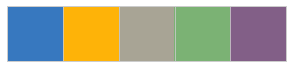

In [40]:
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.palplot(sns.xkcd_palette(colors))

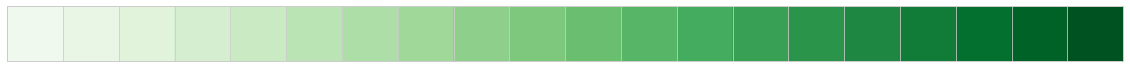

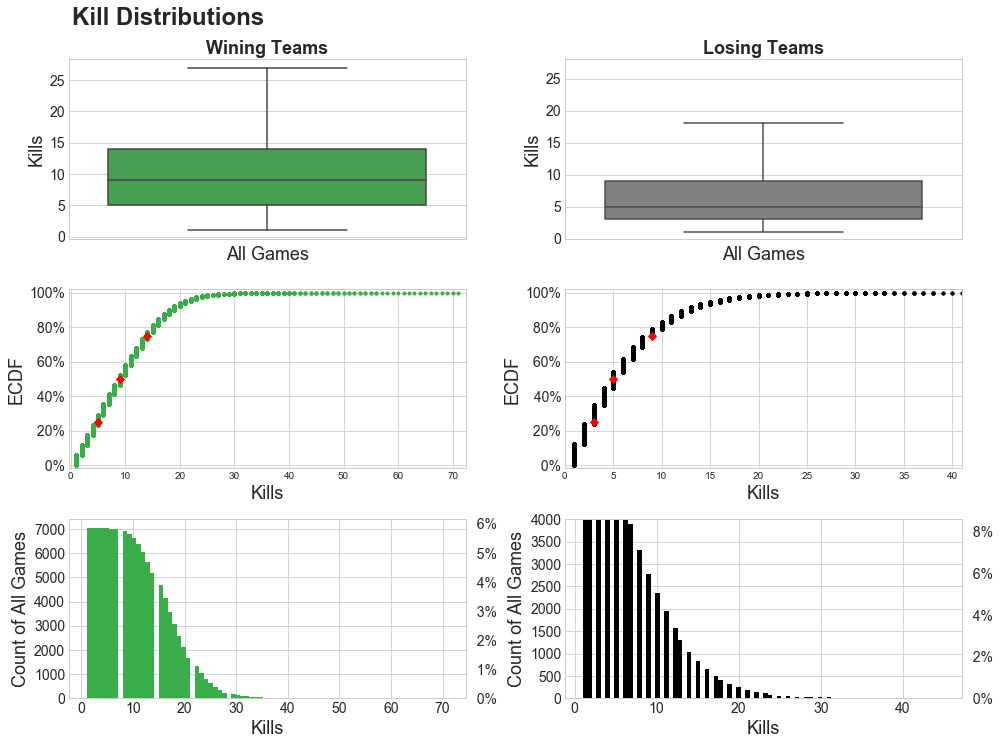

In [41]:
df_kills = melt_kills[melt_kills['minute_bin'].notnull()]
df_kills_win = df_kills[df_kills['win']==True]
df_kills_lose = df_kills[df_kills['win']==False]

# Setstyle options
sns.set_style('whitegrid')
sns.palplot(sns.color_palette('Greens', 20))
color_win = sns.xkcd_rgb['medium green']
color_lose = 'black'

# Create Figure
fig, ax = plt.subplots(3,2, figsize=(14,10))
fig.suptitle('Kill Distributions', x=0.075, y=1.03, fontsize=24, fontweight='bold', 
             horizontalalignment='left')
fig.subplots_adjust(top=0.9)

percentiles = np.array([25, 50, 75])

# Create Subplots

# ------------------------------------- WIN -------------------------------------

# 1 Box and Whisker
p1 = plt.subplot2grid((3,2), (0,0), colspan=1)
sns.boxplot(y=df_kills_win['action_count'], color=color_win, showfliers=False)
plt.title('Wining Teams', fontsize=18, fontweight='bold')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('All Games', fontsize=18)
plt.ylabel('Kills', fontsize = 18)

# 2 ECDF Plot
p2 = plt.subplot2grid((3,2), (1,0), colspan=1)
x = np.sort(df_kills_win['action_count'])
y = np.arange(1, len(x) + 1) / len(x)
ptiles_gl_win = np.percentile(df_kills_win['action_count'], percentiles)
plt.plot(x,y, marker='.', linestyle='none', color=color_win)
plt.plot(ptiles_gl_win, percentiles/100, marker='D', color='red', linestyle='none')

# 2 ECDF Formatting (a lot)
yvals = p2.get_yticks()
p2.set_yticklabels(['{:3.0f}%'.format(y*100) for y in yvals])
plt.yticks(fontsize=14)
plt.xlabel('Kills', fontsize=18)
plt.ylabel('ECDF', fontsize=18)
plt.margins(0.02)

# 3 Histogram Count
p3 = plt.subplot2grid((3,2), (2,0), colspan=1)
plt.hist(x='action_count', bins=80, data=df_kills_win, color=color_win)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Kills', fontsize = 18)
plt.ylabel('Count of All Games', fontsize=18)

# 3 Histogram Percentage - Second Y Axis for Percent (To DO - align Y2 ytick values to Y1 ytick lines)
weights = np.ones_like(df_kills_win['action_count']) / len(df_kills_win['action_count'])
p3 = plt.twinx()
plt.hist(x='action_count', bins=80, weights= weights, data=df_kills_win, color=color_win)
yvals = p3.get_yticks()
p3.set_yticklabels(['{:3.0f}%'.format(y*100) for y in yvals])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
p3.grid(b=False)


# ------------------------------------- LOSE -------------------------------------

# 4 Box and Whisker
p4 = plt.subplot2grid((3,2), (0,1), colspan=1)
sns.boxplot(y=df_kills_lose['action_count'], color='grey', showfliers=False)
plt.title('Losing Teams', fontsize=18, fontweight = 'bold')
plt.ylim(0,28)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('All Games', fontsize=18)
plt.ylabel('Kills', fontsize = 18)

# 5 ECDF Plot
p5 = plt.subplot2grid((3,2), (1,1), colspan=1)
ptiles_gl_lose = np.percentile(df_kills_lose['action_count'], percentiles)
x = np.sort(df_kills_lose['action_count'])
y = np.arange(1, len(x) + 1) / len(x)
plt.plot(x,y, marker='.', linestyle='none', color=color_lose)
plt.plot(ptiles_gl_lose, percentiles/100, marker='D', color='red', linestyle='none')

# 5 ECDF Formatting (a lot)
yvals = p5.get_yticks()
p5.set_yticklabels(['{:3.0f}%'.format(y*100) for y in yvals])

plt.yticks(fontsize=14)
plt.xlim(0, 41)
plt.xlabel('Kills', fontsize=18)
plt.ylabel('ECDF', fontsize=18)
plt.margins(0.02)

# 6 Histogram Count
p6 = plt.subplot2grid((3,2), (2,1), colspan=1)
plt.hist(x='action_count', bins=80, data=df_kills_lose, color='black')
plt.ylim(0,4000)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Kills', fontsize = 18)
plt.ylabel('Count of All Games', fontsize=18)

# 6 Histogram Percentage - Second Y Axis for Percent (To DO - align Y2 ytick values to Y1 ytick lines)
weights = np.ones_like(df_kills_lose['action_count']) / len(df_kills_lose['action_count'])
p6 = plt.twinx()
plt.hist(x='action_count', bins=80, weights= weights, data=df_kills_lose, color=color_lose)
yvals = p6.get_yticks()
p6.set_yticklabels(['{:3.0f}%'.format(y*100) for y in yvals])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylim(0,43)
p6.grid(b=False)

# Show everything
plt.tight_layout()
plt.show()

Logistic Regression for some attrbutes

In [42]:
df2=df[['gamelength','bKills_min','rKills_min','goldblue','bResult']]

In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7053 entries, 0 to 7052
Data columns (total 5 columns):
gamelength    7053 non-null int64
bKills_min    7053 non-null object
rKills_min    7053 non-null object
goldblue      7053 non-null object
bResult       7053 non-null int64
dtypes: int64(2), object(3)
memory usage: 275.6+ KB


In [44]:
bKillsNumArray=[]
for row in df["bKills_min"]:
    bKillsNumArray.append(len(row))
df2['bKills_num'] = bKillsNumArray

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [45]:
rKillsNumArray=[]
for row in df["rKills_min"]:
    rKillsNumArray.append(len(row))
df2['rKills_num'] = rKillsNumArray

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [46]:
bGoldin5=[]
bGoldin10=[]
bGoldin15=[]
for row in df["goldblue"]:
    bGoldin5.append(row[4])
    bGoldin10.append(row[9])
    bGoldin15.append(row[14])
df2['bGoldin5'] = bGoldin5
df2['bGoldin10'] = bGoldin10
df2['bGoldin15'] = bGoldin15

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

In [47]:
# drop uncessary columns
df2.drop(['bKills_min', 'rKills_min','goldblue'],axis=1,inplace=True)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [48]:
df2.head()

,gamelength,bResult,bKills_num,rKills_num,bGoldin5,bGoldin10,bGoldin15
0,40,1,16,9,5068,11361,18324
1,38,0,10,9,5511,11419,19698
2,40,1,22,8,4933,12374,21237
3,41,0,10,21,5398,12033,19332
4,35,1,22,10,5404,11943,19426


# Checking for independence between features

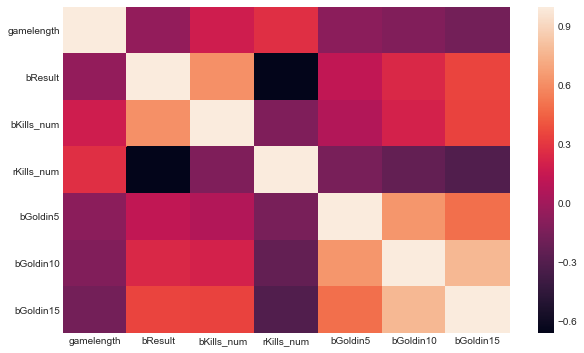

In [49]:
import seaborn as sb
sb.set_style('whitegrid')
sb.heatmap(df2.corr())  

In [50]:
df2.head()

,gamelength,bResult,bKills_num,rKills_num,bGoldin5,bGoldin10,bGoldin15
0,40,1,16,9,5068,11361,18324
1,38,0,10,9,5511,11419,19698
2,40,1,22,8,4933,12374,21237
3,41,0,10,21,5398,12033,19332
4,35,1,22,10,5404,11943,19426


# Deploying and evaluating the model

In [51]:
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold, cross_val_score

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [52]:
y, X = dmatrices('bResult ~ gamelength + bKills_num + rKills_num + bGoldin10 + bGoldin5 + bGoldin15',data=df2, return_type="dataframe")
y = np.ravel(y)

In [53]:
model = LogisticRegression()
model = model.fit(X, y)
model.score(X, y)

0.94725648660144623

In [54]:
#Display the name of each column 
X.columns

Index(['Intercept', 'gamelength', 'bKills_num', 'rKills_num', 'bGoldin10',
       'bGoldin5', 'bGoldin15'],
      dtype='object')

In [55]:
#Show coefficeints for each factor(the degree od relativity)
model.coef_

array([[ -1.51651896e-03,   6.66702339e-03,   5.22038706e-01,
         -5.24516960e-01,   7.22265362e-05,   7.78580457e-05,
         -7.01339931e-05]])

Gamelength, bKills_num, bGoldin10, bGoldin5, These four attributes hav positive relationship with incident - blue wins while rKills_num and rKills_num have negative relationship.

However, bKills_num and rKills_num would affect the reuslts mostly

In [56]:
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print (scores)
print (scores.mean())

[ 0.94908062  0.94050992  0.95602837  0.96595745  0.95460993  0.93758865
  0.92765957  0.94751773  0.93475177  0.95035461]
0.946405862247


## Code Documentation

#### Environment Setup
1. Get a API-KEY from Riots.com
In order further access the information needed to train the Neutral Network, Get the key here with your Riots here: https://developer.riotgames.com/


2. Configure the Software environment
In order to smoothly run this application, we have to configure the following environment  
(1) Install the Python3  
(2) Use this piece of command to install necessay -- "pip install numpy pandas PyQt5 configparser python-slugify requests keras tensorflow h5py"

#### Generate the cofinguration file

In [4]:
from __future__ import print_function

import configparser
import json
import os
import urllib.request
from datetime import datetime
from slugify import slugify
from collections import OrderedDict
from InterfaceAPI import InterfaceAPI

# update the configuration file
# Update the working patch and champions list
def run():
    config = configparser.ConfigParser()
    # if the file already existed, open and modify it
    if os.path.isfile('config.ini'):
        config.read('config.ini')
        API_KEY = config['PARAMS']['api-key']
    # if the file does not exist, new a file and record the input information
    else:
        def validationInput(msg, validAns):
            while True:
                ans = input(msg)
                if ans.lower() in validAns:
                    return ans
                print('Incorrect value. Only', validAns, 'are accepted')

        # define the parameters in configu file
        config.add_section('PARAMS')
        config.add_section('LEAGUES')
        config.add_section('REGIONS')
        config.add_section('PATCHES')
        config.add_section('CHAMPIONS')
        config.add_section('ROLES')
        config.add_section('TOP')
        config.add_section('JUNGLE')
        config.add_section('MID')
        config.add_section('CARRY')
        config.add_section('SUPPORT')

        print("No config file found. Let's set up a few parameters (you may change them anytime by manually editing config.ini)")
        API_KEY = input('API-KEY from (https://developer.riotgames.com/): ')
        config['PARAMS']['api-key'] = API_KEY
        config['PARAMS']['database'] = input('Database location (eg. C:\LoLAnalyzerDB): ')
        print('Leagues you want to download games from (y/n): ')
        config['LEAGUES']['challenger'] = 'yes' if validationInput('challenger: ', ['y', 'n']) == 'y' else 'no'
        config['LEAGUES']['master'] = 'yes' if validationInput('master: ', ['y', 'n']) == 'y' else 'no'
        config['LEAGUES']['diamond'] = 'yes' if validationInput('diamond (not recommended): ', ['y', 'n']) == 'y' else 'no'
        config['LEAGUES']['platinum'] = 'yes' if validationInput('platinum (not recommended): ', ['y', 'n']) == 'y' else 'no'
        config['LEAGUES']['gold'] = 'yes' if validationInput('gold (not recommended): ', ['y', 'n']) == 'y' else 'no'
        config['LEAGUES']['silver'] = 'yes' if validationInput('silver (not recommended): ', ['y', 'n']) == 'y' else 'no'
        config['LEAGUES']['bronze'] = 'yes' if validationInput('bronze (not recommended): ', ['y', 'n']) == 'y' else 'no'
        print('Regions you want to download games from (the more the better) (y/n): ')
        config['REGIONS']['ru'] = 'yes' if validationInput('ru: ', ['y', 'n']) == 'y' else 'no'
        config['REGIONS']['kr'] = 'yes' if validationInput('kr: ', ['y', 'n']) == 'y' else 'no'
        config['REGIONS']['br1'] = 'yes' if validationInput('br1: ', ['y', 'n']) == 'y' else 'no'
        config['REGIONS']['oc1'] = 'yes' if validationInput('oc1: ', ['y', 'n']) == 'y' else 'no'
        config['REGIONS']['jp1'] = 'yes' if validationInput('jp1: ', ['y', 'n']) == 'y' else 'no'
        config['REGIONS']['na1'] = 'yes' if validationInput('na1: ', ['y', 'n']) == 'y' else 'no'
        config['REGIONS']['eun1'] = 'yes' if validationInput('eun1: ', ['y', 'n']) == 'y' else 'no'
        config['REGIONS']['euw1'] = 'yes' if validationInput('euw1: ', ['y', 'n']) == 'y' else 'no'
        config['REGIONS']['tr1'] = 'yes' if validationInput('tr1: ', ['y', 'n']) == 'y' else 'no'
        config['REGIONS']['la1'] = 'yes' if validationInput('la1: ', ['y', 'n']) == 'y' else 'no'
        config['REGIONS']['la2'] = 'yes' if validationInput('la2: ', ['y', 'n']) == 'y' else 'no'

    #get the champions information and number each champion
    api = InterfaceAPI(API_KEY)
    PATCHES = api.getData('https://euw1.api.riotgames.com/lol/static-data/v3/versions')
    PATCHES = ['.'.join(s.split('.')[:2]) for s in reversed(PATCHES)]
    config['PARAMS']['download_patches'] = PATCHES[-1]
    print('Current patch set to:', config['PARAMS']['download_patches'])
    PATCHES = OrderedDict((x, True) for x in PATCHES).keys()
    config['PARAMS']['patches'] = ','.join(PATCHES)
    print('Patch list updated')
    json_data=api.getData('https://euw1.api.riotgames.com/lol/static-data/v3/champions', data={'locale': 'en_US', 'dataById':'true'})
    CHAMPIONS = json_data['data']
    sortedChamps = []
    for champ_id, champ_info in CHAMPIONS.items():
        slugname = slugify(champ_info['name'], separator='')
        config['CHAMPIONS']['slugname'] = champ_id
        sortedChamps.append(slugname)


    response = urllib.request.urlopen('http://universe-meeps.leagueoflegends.com/v1/en_us/champion-browse/index.json')
    data = json.loads(response.read().decode())
    champ_date = {}
    for champ in data['champions']:
        date = champ['release-date']
        date = date[1:] if date[0] == ' ' else date
        date = date [:10]
        champ_date[slugify(champ['name'], separator='')] = datetime.strptime(date, '%Y-%m-%d')
    sortedChamps.sort(key=lambda x: (champ_date[x], x)) #sorted by date and then alphabetical order
    config['PARAMS']['sortedChamps'] = ','.join(sortedChamps)
    print('Champions list updated')

    with open('config.ini', 'w') as configfile:
        config.write(configfile)

    print('-- Update complete --')

if __name__ == '__main__':
    run()


Current patch set to: 8.8
Patch list updated
Champions list updated
-- Update complete --


#### Collect the players information from offical API

In [5]:
import os

import multiprocessing
import time
import pickle

import sys
from pickle import PickleError

from InterfaceAPI import InterfaceAPI, ApiError403, ApiError
import Modes

MAX_DAYS = 1  # up to how many days we look up
# Note it's not important that we get every single player, since we only need one participant for each game
MAX_DEPTH = 1000 * (time.time() - 86400 * MAX_DAYS)
ATTEMPTS = 6
ATTEMPTS_WAIT = 300
SAVE_INTERVAL = 600  # save every 10 minutes
DATABASE_WAIT = 60  # if the database cannot be reached, wait

# Collect for each region the list of players by league

# As a starting list, we only take master/challenger players
class PlayerListing:
    def __init__(self, database, leagues, region, fast=False):
        self.api = InterfaceAPI()
        self.database = database
        self.leagues = leagues
        self.region = region
        self.nextSave = time.time() + SAVE_INTERVAL
        from_scratch = True

        if not os.path.isdir(self.database):
            raise FileNotFoundError(self.database)

        if not os.path.isdir(os.path.join(self.database, 'player_listing', self.region)):
            os.makedirs(os.path.join(self.database, 'player_listing', self.region))

        if os.path.exists(os.path.join(database, 'player_listing', self.region, 'players')):
                self.players = pickle.load(open(os.path.join(database, 'player_listing', self.region, 'players'), 'rb'))
                for league in leagues:
                    if self.players[league]:
                        from_scratch = False
                        break

        else:
            self.players = {}
            for league in leagues:
                self.players[league] = []

        # to make sure we don't explore several time the same player/ games
        if os.path.exists(os.path.join(database, 'player_listing', self.region, 'exploredPlayers')):
            self.exploredPlayers = pickle.load(open(os.path.join(database, 'player_listing', self.region, 'exploredPlayers'), 'rb'))
        else:
            self.exploredPlayers = []
        if os.path.exists(os.path.join(database, 'player_listing', self.region, 'exploredGames')):
            self.exploredGames = pickle.load(open(os.path.join(database, 'player_listing', self.region, 'exploredGames'), 'rb'))
        else:
            self.exploredGames = []
        if os.path.exists(os.path.join(database, 'player_listing', self.region, 'to_explore')):
            self.to_explore = pickle.load(open(os.path.join(database, 'player_listing', self.region, 'to_explore'), 'rb'))
        else:
            self.to_explore = []
        if os.path.exists(os.path.join(database, 'player_listing', self.region, 'exploredLeagues')):
            self.exploredLeagues = pickle.load(open(os.path.join(database, 'player_listing', self.region, 'exploredLeagues'), 'rb'))
        else:
            self.exploredLeagues = []

        if from_scratch:
            print(region, 'first time exploration, checking challenger and master leagues', file=sys.stderr)
            # only the first time
            if fast:  # only the challenger and master league, no need to explore anything
                challLeague = self.api.getData('https://%s.api.riotgames.com/lol/league/v3/challengerleagues/by-queue/RANKED_SOLO_5x5' % self.region)
                for e in challLeague['entries']:
                    self.players['challenger'].append(int(e['playerOrTeamId']))
                masterLeague = self.api.getData('https://%s.api.riotgames.com/lol/league/v3/masterleagues/by-queue/RANKED_SOLO_5x5' % self.region)
                for e in masterLeague['entries']:
                    self.players['master'].append(int(e['playerOrTeamId']))
            else:
                challLeague = self.api.getData('https://%s.api.riotgames.com/lol/league/v3/challengerleagues/by-queue/RANKED_SOLO_5x5' % self.region)
                for e in challLeague['entries']:
                    self.to_explore.append(int(e['playerOrTeamId']))
                masterLeague = self.api.getData('https://%s.api.riotgames.com/lol/league/v3/masterleagues/by-queue/RANKED_SOLO_5x5' % self.region)
                for e in masterLeague['entries']:
                    self.to_explore.append(int(e['playerOrTeamId']))
                self.exploredPlayers = list(self.to_explore)

    # Strategy: we go through the list of all the known players and check their games
    def explore(self):
        print(self.region, len(self.to_explore), 'players left to explore', file=sys.stderr)
        while self.to_explore:
            if time.time() > self.nextSave:
                print(self.region, len(self.to_explore), 'players left to explore', file=sys.stderr)
                print(self.region, 'saving...', file=sys.stderr)
                self.save()
                self.nextSave = time.time() + SAVE_INTERVAL

            sumID = self.to_explore.pop(0)  # strongest players first
            try:
                accountID = self.api.getData('https://%s.api.riotgames.com/lol/summoner/v3/summoners/%s' % (self.region, sumID))['accountId']
                games = \
                    self.api.getData('https://%s.api.riotgames.com/lol/match/v3/matchlists/by-account/%s' % (self.region, accountID), {'queue': 420})[
                        'matches']
                playerLeagueList = self.api.getData('https://%s.api.riotgames.com/lol/league/v3/leagues/by-summoner/%s' % (self.region, sumID))
            except ApiError403 as e:
                print(e, file=sys.stderr)
                return e
            except ApiError as e:
                print(e, file=sys.stderr)
                continue

            # we check that the summoner is in one of the leagues we want
            playerSoloQLeague = None
            for league in playerLeagueList:
                if league['queue'] == 'RANKED_SOLO_5x5':
                    playerSoloQLeague = league
                    break
            if not playerSoloQLeague:
                print('no soloQ rank: ', self.region, sumID)
                continue
            playerLeagueTier = playerSoloQLeague['tier'].lower()
            playerLeagueName = playerSoloQLeague['name']
            if playerLeagueTier not in self.leagues:
                print('refused tier:', self.region, sumID, playerLeagueTier)
                continue

            self.players[playerLeagueTier].append(sumID)
            print('added:', self.region, sumID, playerLeagueTier)

            # We add all the people in the same league for exploration
            if playerLeagueName not in self.exploredLeagues:
                self.exploredLeagues.append(playerLeagueName)
                print('new league found:', self.region, playerLeagueTier, playerLeagueName)
                for e in playerSoloQLeague['entries']:
                    sumID = int(e['playerOrTeamId'])
                    if sumID not in self.exploredPlayers:
                        self.to_explore.append(sumID)
                        self.exploredPlayers.append(sumID)

            # We have to explore some games to get to other leagues
            # We hope that at least 1 player of each league has played within the time window
            for game in games:  # from most recent to oldest
                # the same game can come up to 10 times, so it's better to not make useless API calls
                if game['gameId'] in self.exploredGames:
                    continue
                self.exploredGames.append(game['gameId'])
                gameID = str(game['gameId'])
                timestamp = game['timestamp']
                if timestamp < MAX_DEPTH:  # game is too old?
                    break

                try:
                    gameData = self.api.getData('https://%s.api.riotgames.com/lol/match/v3/matches/%s' % (self.region, gameID))
                except ApiError403 as e:
                    print(e, file=sys.stderr)
                    return e
                except ApiError as e:
                    print(e, file=sys.stderr)
                    continue

                # adding all the non explored players from the game
                for participant in gameData['participantIdentities']:
                    sumID = participant['player']['summonerId']
                    if sumID not in self.exploredPlayers:
                        self.to_explore.append(sumID)
                        self.exploredPlayers.append(sumID)

        return None  # everything explored

    #save the players information we explored
    def save(self):
        while True:
            if not os.path.isdir(self.database):
                print(self.region, 'cannot access the database', file=sys.stderr)
                time.sleep(DATABASE_WAIT)
                continue

            try:
                pickle.dump(self.players, open(os.path.join(self.database, 'player_listing', self.region, 'players'), 'wb'))
                pickle.dump(self.exploredPlayers, open(os.path.join(self.database, 'player_listing', self.region, 'exploredPlayers'), 'wb'))
                pickle.dump(self.exploredLeagues, open(os.path.join(self.database, 'player_listing', self.region, 'exploredLeagues'), 'wb'))
                pickle.dump(self.exploredGames, open(os.path.join(self.database, 'player_listing', self.region, 'exploredGames'), 'wb'))
                pickle.dump(self.to_explore, open(os.path.join(self.database, 'player_listing', self.region, 'to_explore'), 'wb'))
            except (PickleError, FileNotFoundError) as e:
                print(e, file=sys.stderr)
                print(self.region, 'saving failed', file=sys.stderr)
                time.sleep(DATABASE_WAIT)
                continue
            break

#Keep exploring the players information for other REGIONS which we define yes in config.ini
def keepExploring(database, leagues, region, attempts=ATTEMPTS):
    print(region, 'starting player listing', file=sys.stderr)
    pl = None
    if list(set(leagues) - {'challenger', 'master'}):  # we check it is necessary to look for the leagues
        while True:
            if not pl:
                try:
                    pl = PlayerListing(database, leagues, region)
                except ApiError403 as e:
                    print('FATAL ERROR', region, e, file=sys.stderr)
                    break
                except ApiError as e:
                    print(e, file=sys.stderr)
                    attempts -= 1
                    if attempts <= 0:
                        print(region, 'initial connection failed. No more connection attempt.', file=sys.stderr)
                        break
                    print(region, 'initial connection failed. Retrying in {} minutes. Attempts left:'.format(ATTEMPTS_WAIT, attempts), file=sys.stderr)
                    time.sleep(ATTEMPTS_WAIT)
                    continue
                except (PickleError,  FileNotFoundError) as e:
                    print(e, file=sys.stderr)
                    print(region, 'cannot access the database', file=sys.stderr)
                    time.sleep(DATABASE_WAIT)
                    continue

            try:
                e = pl.explore()
            except KeyError:  # appends sometime, looks like some data is corrupted
                continue
            if e is not None:
                print('FATAL ERROR', region, e, file=sys.stderr)
            else:
                print(region, 'all players explored downloaded', file=sys.stderr)
            break
    else:  # only master/challenger league
        while True:
            if not pl:
                try:
                    pl = PlayerListing(database, leagues, region, fast=True)
                except ApiError403 as e:
                    print('FATAL ERROR', region, e, file=sys.stderr)
                    break
                except ApiError as e:
                    print(e, file=sys.stderr)
                    attempts -= 1
                    if attempts <= 0:
                        print(region, 'initial connection failed. No more connection attempt.', file=sys.stderr)
                        break
                    print(region, 'initial connection failed. Retrying in {} minutes. Attempts left: {}'.format(ATTEMPTS_WAIT, attempts), file=sys.stderr)
                    time.sleep(ATTEMPTS_WAIT)
                    continue
                except (PickleError, FileNotFoundError) as e:
                    print(e, file=sys.stderr)
                    print(region, 'cannot access the database', file=sys.stderr)
                    time.sleep(DATABASE_WAIT)
                    continue

            # No need to explore
            print(region, 'all players explored downloaded', file=sys.stderr)
            break

    # we finally save the players list
    if pl is not None:
        print(region, 'Saving players list', file=sys.stderr)
        pl.save()

# the main method for running
def run(mode):
    assert isinstance(mode, Modes.Base_Mode), 'Unrecognized mode {}'.format(mode)

    keprocs = []
    for region in mode.REGIONS:
        keprocs.append(multiprocessing.Process(target=keepExploring, args=(mode.DATABASE, mode.LEAGUES, region)))
        keprocs[-1].start()

    for keproc in keprocs:
        keproc.join()

    print('-- Listing complete --')


if __name__ == '__main__':
    m = Modes.Base_Mode()
    run(m)


-- Listing complete --


#### Download recent matches from the Riot API for Challenger/Master players

In [6]:
import configparser
import multiprocessing
import os
import pickle
import random
import sys
import time

from Modes import Base_Mode
from multiprocessing import Manager

from InterfaceAPI import InterfaceAPI, ApiError, ApiError404, ApiError403

ATTEMPTS = 3

#Download games from the Riot API for Challenger/Master players
class DataDownloader:
    def __init__(self, database, patch, region, leagues, timestamped_patches):
        self.api = InterfaceAPI()
        self.database = database
        self.region = region
        self.patch = patch
        self.timestamped_patches = timestamped_patches
        self.db = os.path.join(self.database, 'patches', self.patch, self.region)
        if not os.path.exists(self.db):
            os.makedirs(self.db)

        downloadedFile_name = self.region + '.txt'
        self.downloadedGamesPath = os.path.join(self.database, 'patches', self.patch, downloadedFile_name)
        if os.path.isfile(self.downloadedGamesPath):
            with open(self.downloadedGamesPath, 'r') as f:
                self.downloadedGames = [x.strip() for x in f.readlines()]
        else:
            self.downloadedGames = []
        self.summonerIDs = []
        players = pickle.load(open(os.path.join(database, 'player_listing', region, 'players'), 'rb'))
        for league in leagues:
            self.summonerIDs.extend(players[league])

        random.shuffle(self.summonerIDs)

    # Download games from the Riot API from Challenger/Master players
    def downloadData(self):
        while self.summonerIDs:  # if the API in unavailable, or the sumID is unreachable for some reason, just take the skip to the next
            sumID = self.summonerIDs.pop()
            try:
                accountID = self.api.getData('https://%s.api.riotgames.com/lol/summoner/v3/summoners/%s' % (self.region, sumID))['accountId']
                games = \
                    self.api.getData('https://%s.api.riotgames.com/lol/match/v3/matchlists/by-account/%s' % (self.region, accountID), {'queue': 420})[
                        'matches']
            except ApiError403 as e:
                print(e, file=sys.stderr)
                return e
            except ApiError as e:
                print(e, file=sys.stderr)
                continue
            for game in games:  # from most recent to oldest
                gameID = str(game['gameId'])

                # Already downloaded ? This means we are up-to-date
                if gameID in self.downloadedGames:
                    break

                # Wrong timestamp?
                timestamp = game['timestamp']
                previous_patch = self.patch
                previous_patch = previous_patch.split('.')
                previous_patch[1] = str(int(previous_patch[1]) - 1)
                previous_patch = '.'.join(previous_patch)
                if previous_patch in self.timestamped_patches and self.timestamped_patches[previous_patch][1] > timestamp:  # game is too old
                    break  # all the next games are too old

                next_patch = self.patch
                next_patch = next_patch.split('.')
                next_patch[1] = str(int(next_patch[1]) + 1)
                next_patch = '.'.join(next_patch)
                if next_patch in self.timestamped_patches and self.timestamped_patches[next_patch][0] < timestamp:  # game is too recent
                    continue  # need to go further

                try:
                    gameData = self.api.getData('https://%s.api.riotgames.com/lol/match/v3/matches/%s' % (self.region, gameID))
                except ApiError403 as e:
                    print(e, file=sys.stderr)
                    return e
                except ApiError404 as e:
                    print(e, file=sys.stderr)
                    break
                except ApiError as e:
                    print(e, file=sys.stderr)
                    continue

                # update timestamps: gameData['gameCreation'] == game['timestamp']
                gamePatch = '.'.join(gameData['gameVersion'].split('.')[:2])
                timestamp = gameData['gameCreation']
                if gamePatch not in self.timestamped_patches:
                    self.timestamped_patches[gamePatch] = [timestamp, timestamp]
                else:  # first seen and last seen
                    if self.timestamped_patches[gamePatch][0] > timestamp:
                        self.timestamped_patches[gamePatch][0] = timestamp
                    elif self.timestamped_patches[gamePatch][1] < timestamp:
                        self.timestamped_patches[gamePatch][1] = timestamp

                # Game too old ?
                # formatting both so we can compare
                gameVersion = gameData['gameVersion'].split('.')[:2]
                gameVersion = tuple(list(map(int, gameVersion)))
                patchVersion = tuple(list(map(int, self.patch.split('.'))))
                if gameVersion < patchVersion:  # too old history
                    break
                if gameVersion > patchVersion:  # too recent history
                    continue

                # saving game
                file_path = os.path.join(self.db, gameID)
                try:
                    pickle.dump(gameData, open(file_path, 'wb'))
                except FileNotFoundError as e:
                    print(e, file=sys.stderr)
                    time.sleep(1)
                    continue
                self.downloadedGames.append(gameID)
                print(self.patch, self.region, gameID)
                try:
                    with open(self.downloadedGamesPath, 'a+') as f:
                        f.write(gameID + '\n')
                except FileNotFoundError as e:
                    print(e, file=sys.stderr)
                    time.sleep(1)
                    continue

        return None  # No data left to download

#We collect the match records for different REGIONS which we define in configuration file
def keepDownloading(database, patches, region, leagues, timestamped_patches, attempts=ATTEMPTS):
    print('Starting data collection for', region, patches, file=sys.stderr)
    for patch in patches:
        dd = None
        while True:
            if not dd:
                try:
                    dd = DataDownloader(database, patch, region, leagues, timestamped_patches)
                except ApiError403 as e:
                    print('FATAL ERROR', patch, region, e, file=sys.stderr)
                    return
                except ApiError as e:
                    print(e, file=sys.stderr)
                    attempts -= 1
                    if attempts <= 0:
                        print(region, 'initial connection failed. End of connection attempts.', file=sys.stderr)
                        return
                    print(region, 'initial connection failed. Retrying in 5 minutes. Attempts left:', attempts, file=sys.stderr)
                    time.sleep(300)
                    continue

            e = dd.downloadData()
            if e is not None:
                print('FATAL ERROR', patch, region, e, file=sys.stderr)
                return
            print(region, patch, 'all games downloaded', file=sys.stderr)
            break
    print(region, 'download complete')

#Keep exploring the match records for other REGIONS which we define yes in config.ini
def saveLastSeen(timestamped_patches, save_interval, end):
    cfg = configparser.ConfigParser()
    cfg.read('config.ini')
    last_save = time.time()
    while not end.is_set():
        if last_save + save_interval < time.time():
            # we save the dictionnary
            for key, value in timestamped_patches.items():
                cfg['PATCHES'][key] = ','.join(list(map(str, value)))
            with open('config.ini', 'w') as configfile:
                cfg.write(configfile)
                print('patch timestamps saved')
            last_save = time.time()
        time.sleep(1)
    # we save the final state of the dictionnary
    for key, value in timestamped_patches.items():
        cfg['PATCHES'][key] = ','.join(list(map(str, value)))
    with open('config.ini', 'w') as configfile:
        cfg.write(configfile)
        print('patch timestamps saved')

# the main method for running
def run(mode):
    assert isinstance(mode, Base_Mode), 'Unrecognized mode {}'.format(mode)

    manager = Manager()
    last_seen_from_patch = manager.dict()
    endUpdate = manager.Event()
    for key, value in mode.config['PATCHES'].items():
        last_seen_from_patch[key] = list(map(int, value.split(',')))  # first seen and last seen

    kdprocs = []
    for region in mode.REGIONS:
        kdprocs.append(
            multiprocessing.Process(target=keepDownloading,
                                    args=(mode.DATABASE, mode.PATCHES_TO_DOWNLOAD, region, mode.LEAGUES, last_seen_from_patch)))
        kdprocs[-1].start()

    slsproc = multiprocessing.Process(target=saveLastSeen, args=(last_seen_from_patch, 300, endUpdate))
    slsproc.start()

    for kdproc in kdprocs:
        kdproc.join()

    endUpdate.set()
    slsproc.join()

    endUpdate.set()

    print('-- Download complete --')


if __name__ == '__main__':
    m = Base_Mode()
    run(m)

-- Download complete --


#### Extract the useful data from match records we download and store in csv_file

In [ ]:
import pickle
import os
import queue
import sys
from collections import OrderedDict
import multiprocessing
from multiprocessing.managers import BaseManager, NamespaceProxy
import time
import Modes
import pandas as pd
from collections import Counter

CHUNK_SIZE = 100

# Extract the useful data from game files (json)
def extracted_writer(extracted_file, q, stop):
    with open(extracted_file, 'a+') as f:
        while not stop.is_set():
            try:
                game_path = q.get(timeout=1)
            except queue.Empty:
                continue
            f.write(game_path)
            f.write('\n')
        print('Closing writer', file=sys.stderr)


class Extractor:
    def __init__(self, mode, extracted_files, current_index, rot_length, writing_q):
        self.mode = mode
        self.rot_length = rot_length
        self.writing_q = writing_q

        self.current_index = current_index
        if len(extracted_files) >= self.current_index > 0:  # the file already exist
            self.csv_file = os.path.join(mode.EXTRACTED_DIR, extracted_files[self.current_index - 1])
            self.csv_index = len(pd.read_csv(self.csv_file, skiprows=1))
            print(self.csv_file, 'lines', self.csv_index, file=sys.stderr)
        else:
            self.csv_file = None
            self.csv_index = mode.DATA_LINES


class ExManager(BaseManager):
    pass


class ExProxy(NamespaceProxy):
    _exposed_ = ('__getattribute__', '__setattr__', '__delattr__', 'b')

ExManager.register('Extractor', Extractor, ExProxy)

#Extract the useful data from match records we download and store in csv_file
def run(mode, cpu):
    extracted_file = mode.EXTRACTED_FILE
    if os.path.isfile(extracted_file):
        with open(extracted_file, 'r') as f:
            extracted_list = [x.strip() for x in f.readlines()]
    else:
        extracted_list = []

    gamePaths = []
    for patch in mode.learning_patches:
        for region in mode.REGIONS:
            if os.path.isdir(os.path.join(mode.DATABASE, 'patches', patch, region)):
                gamePaths.extend(
                    [os.path.join(mode.DATABASE, 'patches', patch, region, f) for f in
                     os.listdir(os.path.join(mode.DATABASE, 'patches', patch, region))])
    print('%d game files found' % len(gamePaths), file=sys.stderr)
    gamePaths = list(set(gamePaths) - set(extracted_list))
    print('%d new games to extract' % len(gamePaths), file=sys.stderr)

    if not os.path.isdir(mode.EXTRACTED_DIR):
        os.makedirs(mode.EXTRACTED_DIR)

    extracted_files = [f for f in os.listdir(mode.EXTRACTED_DIR)]
    l = list(map(lambda x: int(x.replace('data_', '').replace('.csv', '')), extracted_files))
    l = sorted(range(len(l)), key=lambda k: l[k])
    extracted_files = [extracted_files[k] for k in l]

    # multiprocessing
    manager = multiprocessing.Manager()
    writing_q = manager.Queue()
    stop = manager.Event()

    writer = multiprocessing.Process(target=extracted_writer, args=(extracted_file, writing_q, stop))
    writer.start()

    ex_manager = ExManager()
    ex_manager.start()
    available_extractors = []
    running_extractors = []
    for i in range(cpu):
        current_index = len(extracted_files) - i
        # noinspection PyUnresolvedReferences
        available_extractors.append(ex_manager.Extractor(mode, extracted_files, current_index, cpu, writing_q))

    while gamePaths:
        # we work with chunks in order to save time (no need to hand over the extractor for every single game
        chunk = gamePaths[:CHUNK_SIZE]
        gamePaths = gamePaths[CHUNK_SIZE:]
        print(len(gamePaths), 'left', file=sys.stderr)

        while not available_extractors:  # wait until an extractor is available
            for p, ex in running_extractors:
                if p.is_alive():
                    continue
                available_extractors.append(ex)
                running_extractors.remove((p, ex))
            if not available_extractors:  # wait a bit
                time.sleep(0.001)

        # start a new job
        ex = available_extractors.pop()
        p = multiprocessing.Process(target=analyze_game, args=(ex, chunk,))
        running_extractors.append((p, ex))
        p.start()

    for p, ex in running_extractors:
        p.join()

    stop.set()
    writer.join()
    print('-- Extraction complete --')

# Analyze the match record to get the useful data
def analyze_game(ex, gamePaths):
    for gamePath in gamePaths:
        raw_data = OrderedDict([('s_' + champ, []) for champ in ex.mode.CHAMPIONS_LABEL] + [('p_' + champ, []) for champ in ex.mode.CHAMPIONS_LABEL])
        raw_data['patch'] = []
        raw_data['win'] = []
        raw_data['file'] = []
        print(ex.csv_file, gamePath)
        game = pickle.load(open(gamePath, 'rb'))
        bans = []
        game_patch = '_'.join(game['gameVersion'].split('.')[:2])

        if game['gameDuration'] < 300:
            print(gamePath, 'FF afk', game['gameDuration'], file=sys.stderr)
            ex.writing_q.put(gamePath)
            continue

        blueTeam = None
        redTeam = None
        for team in game['teams']:
            if team['teamId'] == 100:
                blueTeam = team
            elif team['teamId'] == 200:
                redTeam = team
            else:
                print(gamePath, 'Unrecognized team %d' % team['teamId'], file=sys.stderr)
                break

            for ban in team['bans']:
                championId = ban['championId']
                if championId not in bans:
                    bans.append(championId)
        if not blueTeam or not redTeam:
            print(gamePath, 'Teams are not recognized', file=sys.stderr)
            ex.writing_q.put(gamePath)
            continue

        # not sure what is written for voided games, so it's safer to check both
        # if we get something else than true/false or false/true we just ignore the file
        blueWin = blueTeam['win'] == 'Win'
        redWin = redTeam['win'] == 'Win'
        if not blueWin ^ redWin:
            print(gamePath, 'No winner found', blueWin, redWin, file=sys.stderr)
            ex.writing_q.put(gamePath)
            continue
        participants = game['participants']

        # Blank, everything is available
        state = OrderedDict()
        state['win'] = int(blueWin)
        state['patch'] = game_patch
        state['file'] = os.path.basename(gamePath)
        state.update([('s_' + champ_name, 'A') for champ_name in ex.mode.CHAMPIONS_LABEL])  # Status
        state.update([('p_' + champ_name, 'N') for champ_name in ex.mode.CHAMPIONS_LABEL])  # Position

        for key, value in state.items():
            raw_data[key].append(value)

        # Bans
        state = OrderedDict(state)  # don't forget to create a clean copy
        for championId in bans:
            for champ_name, champ_id in ex.mode.CHAMPIONS_ID.items():
                if champ_id == championId:
                    state['s_' + champ_name] = 'N'  # None
                    break
        for key, value in state.items():
            raw_data[key].append(value)

        # Smart lane-role
        # The Api doesn't precisely give players role, so we have to deduce it
        b_roles = OrderedDict()
        r_roles = OrderedDict()

        for i in range(0, 10):
            p = participants[i]
            lane = p['timeline']['lane']
            if i < 5:
                if lane == 'TOP':
                    b_roles[i] = 'T'
                elif lane == 'JUNGLE':
                    b_roles[i] = 'J'
                elif lane == 'MIDDLE':
                    b_roles[i] = 'M'
                elif lane == 'BOTTOM':
                    b_roles[i] = 'C'
                else:
                    raise Exception(p, lane)
            else:
                if lane == 'TOP':
                    r_roles[i] = 'T'
                elif lane == 'JUNGLE':
                    r_roles[i] = 'J'
                elif lane == 'MIDDLE':
                    r_roles[i] = 'M'
                elif lane == 'BOTTOM':
                    r_roles[i] = 'C'
                else:
                    raise Exception(p, lane)

        # need to find the support in both team
        b_doubleRole = Counter(b_roles.values()).most_common(1)[0][0]
        b_doublei = [i for i, r in b_roles.items() if r == b_doubleRole]
        if len(b_doublei) > 2:
            print(gamePath, 'fucked up roles', b_roles, file=sys.stderr)
            ex.writing_q.put(gamePath)
            continue
        if 'SUPPORT' in participants[b_doublei[0]]['timeline']['role']:
            b_roles[b_doublei[0]] = 'S'
        elif 'SUPPORT' in participants[b_doublei[1]]['timeline']['role']:
            b_roles[b_doublei[1]] = 'S'
        else:  # Last resort -> check cs
            if 'creepsPerMinDeltas' in participants[b_doublei[0]]['timeline']:
                if participants[b_doublei[0]]['timeline']['creepsPerMinDeltas']['0-10'] < \
                        participants[b_doublei[1]]['timeline']['creepsPerMinDeltas']['0-10']:
                    b_roles[b_doublei[0]] = 'S'
                else:
                    b_roles[b_doublei[1]] = 'S'
            else:
                if participants[b_doublei[0]]['stats']['totalMinionsKilled'] < participants[b_doublei[1]]['stats']['totalMinionsKilled']:
                    b_roles[b_doublei[0]] = 'S'
                else:
                    b_roles[b_doublei[1]] = 'S'
        r_doubleRole = Counter(r_roles.values()).most_common(1)[0][0]
        r_doublei = [i for i, r in r_roles.items() if r == r_doubleRole]
        if len(r_doublei) > 2:
            print(gamePath, 'fucked up roles', r_roles, file=sys.stderr)
            ex.writing_q.put(gamePath)
            continue
        if 'SUPPORT' in participants[r_doublei[0]]['timeline']['role']:
            r_roles[r_doublei[0]] = 'S'
        elif 'SUPPORT' in participants[r_doublei[1]]['timeline']['role']:
            r_roles[r_doublei[1]] = 'S'
        else:  # Last resort -> check cs
            if 'creepsPerMinDeltas' in participants[r_doublei[0]]['timeline']:
                if participants[r_doublei[0]]['timeline']['creepsPerMinDeltas']['0-10'] < \
                        participants[r_doublei[1]]['timeline']['creepsPerMinDeltas']['0-10']:
                    r_roles[r_doublei[0]] = 'S'
                else:
                    r_roles[r_doublei[1]] = 'S'
            else:
                if participants[r_doublei[0]]['stats']['totalMinionsKilled'] < participants[r_doublei[1]]['stats']['totalMinionsKilled']:
                    r_roles[r_doublei[0]] = 'S'
                else:
                    r_roles[r_doublei[1]] = 'S'

        roles = OrderedDict()
        roles.update(b_roles)
        roles.update(r_roles)
        # Draft
        DRAFT_ORDER = [0, 5, 6, 1, 2, 7, 8, 3, 4, 9]
        # This is not exact. This order is not pick order but end-draft order: if some players
        # trade, this order is wrong. Unfortunatelly there is no way to know the real pick order.
        #So we just assume people don't trade often and that trading does not have a huge impact anyway.
        for i in DRAFT_ORDER:
            state = OrderedDict(state)
            bluePick = i < 5
            p = participants[i]
            championId = p['championId']
            for champ_name, champ_id in ex.mode.CHAMPIONS_ID.items():
                if champ_id == championId:
                    state['s_' + champ_name] = 'B' if bluePick else 'R'
                    state['p_' + champ_name] = roles[i]
                    break
            for key, value in state.items():
                raw_data[key].append(value)

        #Append the useful data to a csv file
        df = pd.DataFrame(raw_data, columns=ex.mode.COLUMNS)
        if ex.csv_index + len(df) < ex.mode.DATA_LINES:
            df.to_csv(ex.csv_file, mode='a', header=False, index=False)
            ex.csv_index += len(df)
        else:  # split the data in two: finish prev file and start another
            to_current = df.iloc[:ex.mode.DATA_LINES - ex.csv_index]
            to_next = df.iloc[ex.mode.DATA_LINES - ex.csv_index:]
            to_current.to_csv(ex.csv_file, mode='a', header=False, index=False)
            # preparing new file
            ex.current_index += ex.rot_length
            current_file = 'data_' + str(ex.current_index) + '.csv'
            ex.csv_file = os.path.join(ex.mode.EXTRACTED_DIR, current_file)
            ex.csv_index = 0
            to_next.to_csv(ex.csv_file, mode='a', header=True, index=False)
            ex.csv_index += len(to_next)

        # File fully explored
        ex.writing_q.put(gamePath)


if __name__ == '__main__':
    m = Modes.ABR_TJMCS_Mode(['8.8'])
    run(m, max(multiprocessing.cpu_count() - 1, 1))

6207 game files found
5750 new games to extract


#### Pre-process the data according to a given pattern

In [ ]:
from functools import partial
import numpy as np
import multiprocessing
import pandas as pd
import os
import Modes

np.set_printoptions(formatter={'float_kind': lambda x: "%.2f" % x}, linewidth=200)

# Pre-process the data according to a given pattern
def processing(mode, dataFile):
    currentFile = os.path.join(mode.PREPROCESSED_DIR, dataFile)
    if os.path.isfile(currentFile):
        preprocessed_df = pd.read_csv(currentFile, header=None)
    else:
        preprocessed_df = []
    df = pd.read_csv(os.path.join(mode.EXTRACTED_DIR, dataFile), names=mode.COLUMNS, dtype=mode.DTYPE, skiprows=1)
    print(currentFile, len(df) - len(preprocessed_df), "rows to analyze")
    data = pd.DataFrame(columns=range(mode.INPUT_SIZE + mode.OUTPUT_SIZE))
    for i in range(len(preprocessed_df), len(df)):
        if i % mode.SAVE == 0 and i != len(preprocessed_df):  # saving periodically because the process is rather long
            print(currentFile, len(df) - i)
            data = data.astype(int)
            data.to_csv(currentFile, mode='a', header=False, index=False)
            data = pd.DataFrame(columns=range(mode.INPUT_SIZE + mode.OUTPUT_SIZE))

        state = df.iloc[i]
        data.loc[len(data)] = mode.row_data(state, with_output=True)
    if len(data):
        data = data.astype(int)
        data.to_csv(currentFile, mode='a', header=False, index=False)
    print(currentFile, 'DONE')

# listing extracted files and sorting
def run(mode, cpu):
    if not os.path.isdir(mode.PREPROCESSED_DIR):
        os.makedirs(mode.PREPROCESSED_DIR)

    extracted_files = [f for f in os.listdir(mode.EXTRACTED_DIR)]
    l = list(map(lambda x: int(x.replace('data_', '').replace('.csv', '')), extracted_files))
    l = sorted(range(len(l)), key=lambda k: l[k])
    extracted_files = [extracted_files[k] for k in l]

    pool = multiprocessing.Pool(processes=cpu)
    fun = partial(processing, mode)
    pool.map(fun, extracted_files, chunksize=1)
    pool.close()
    pool.join()

if __name__ == '__main__':
    m = Modes.ABR_TJMCS_Mode(['8.8'])
    run(m, max(multiprocessing.cpu_count() - 1, 1))


#### Moving consecutive lines from the same file in different files

In [ ]:
import multiprocessing
from functools import partial
import gc
import pandas as pd
import os
import sys

import time

import Modes
import shutil

import Networks

# moving consecutive lines from the same file in different files
# it's not a real shuffle from random but it spreads the data as much as possible so its the same
def shuffling(mode, dataFile, nb_files, cpu):
    df = pd.read_csv(os.path.join(mode.PREPROCESSED_DIR, dataFile), header=None)
    pool = multiprocessing.Pool(processes=cpu)
    for i in range(nb_files):
        currentFile = os.path.join(mode.TRAINING_DIR, 'data_' + str(i + 1) + '.csv')
        index = [k * nb_files + i for k in range(len(df) // nb_files) if k * nb_files + i < len(df)]
        data = df.iloc[index, :]
        # saving is made async to gain time and keep the disk as busy as we can (it's clearly the limiting factor here)
        # data is not that big so copying is not time-consuming
        pool.apply_async(save_in_file, args=(data, currentFile,))
    pool.close()
    pool.join()
    print(dataFile, 'shuffled for training')


def save_in_file(data, currentFile):
    data.to_csv(currentFile, mode='a', header=False, index=False)

# validate the input data
def validationInput(msg, validAns):
    while True:
        data = input(msg)
        if data.lower() in validAns:
            return data
        print('Incorrect value. Only', validAns, 'are accepted')

# the main running method for shuffling the former data we processed
def run(mode, nb_files, keep_for_testing, cpu):
    if os.path.isdir(mode.TRAINING_DIR):
        print('WARNING PREVIOUS SHUFFLED DATA FOUND', file=sys.stderr)
        # validation is annoying
        # if validationInput('Do you want to reshuffle the data anyway (take a while)? (y/n)', ['y', 'n']) == 'n':
        #     return

        if not os.access(mode.TRAINING_DIR, os.W_OK):
            # Is the error an access error ?
            # noinspection PyUnresolvedReferences
            os.chmod(mode.TRAINING_DIR, os.stat.S_IWUSR)
        shutil.rmtree(mode.TRAINING_DIR)
    os.makedirs(mode.TRAINING_DIR)
    if not os.path.isdir(mode.TESTING_DIR):
        os.makedirs(mode.TESTING_DIR)

    # listing extracted files and sorting
    preprocessed_files = [f for f in os.listdir(mode.PREPROCESSED_DIR)]
    l = list(map(lambda x: int(x.replace('data_', '').replace('.csv', '')), preprocessed_files))
    l = sorted(range(len(l)), key=lambda k: l[k])
    preprocessed_files = [preprocessed_files[k] for k in l]

    for file in preprocessed_files:
        shuffling(mode, file, nb_files, cpu)

    for _ in range(keep_for_testing):
        if len(preprocessed_files):
            testing_file = preprocessed_files.pop(0)  # take data away for testing
            # no need to shuffle since it's a test
            shutil.copyfile(os.path.join(mode.PREPROCESSED_DIR, testing_file), os.path.join(mode.TESTING_DIR, testing_file))
            print(testing_file, 'stored for testing')



if __name__ == '__main__':
    m = Modes.ABR_TJMCS_Mode(['8.8'])
    run(m, 89, 7, cpu=max(multiprocessing.cpu_count() - 1, 1))


#### Build the training model using the data we shuffled

In [1]:
import os
import random
import keras
import Modes
import Networks
import sys
import pandas as pd
import numpy as np

np.set_printoptions(formatter={'float_kind': lambda x: "%.2f" % x}, linewidth=200)

# Build the training model using the data we shuffled
class dataCollector:
    def __init__(self, mode, batchSize, partial_drafts=True):
        self.mode = mode
        self.batchSize = batchSize
        self.partial_drafts = partial_drafts
        self.i = 0
        if keras.backend.learning_phase() == 1:  # training phase
            self.data_files = [os.path.join(mode.TRAINING_DIR, f) for f in os.listdir(mode.TRAINING_DIR)]
        elif keras.backend.learning_phase() == 0:
            self.data_files = [os.path.join(mode.TESTING_DIR, f) for f in os.listdir(mode.TESTING_DIR)]
        else:
            raise Exception('Unknown flag {}'.format(keras.backend.learning_phase()))
        random.shuffle(self.data_files)
        file = self.data_files.pop()
        self.df = pd.read_csv(file).sample(frac=1).reset_index(drop=True)

    def batchGenerator(self):
        while True:
            j = min(self.i + self.batchSize, len(self.df))
            if self.partial_drafts:
                x = self.df.iloc[self.i:j, :-1].values.tolist()
                y = self.df.iloc[self.i:j, -1:].values.tolist()  # last column is the win value
            else:
                data = self.df.iloc[self.i:j, :].values.tolist()
                x = []
                y = []
                start = len(self.mode.CHAMPIONS_STATUS) * self.mode.CHAMPIONS_SIZE
                end = start + len(self.mode.CHAMPIONS_POSITION) * self.mode.CHAMPIONS_SIZE
                for line in data:
                    # we count how many positions have been set, for a full draft it's 10
                    if line[start:end].count(1) == 10:
                        x.append(line[:-1])
                        y.append(line[-1:])
            if j < len(self.df):
                self.i = j
            else:
                self.i = 0
                if self.data_files:
                    self.df = pd.read_csv(self.data_files.pop()).sample(frac=1).reset_index(drop=True)
                else:
                    yield x, y  # last batch
                    break
            yield x, y

# testing the model for the whole drafts
def training(mode, network, restore, window_size=1000):
    keras.backend.set_learning_phase(1)  # training phase

    model_file = os.path.join(mode.CKPT_DIR, str(network) + '.h5')
    print('-- New training Session --', file=sys.stderr)
    print(model_file, file=sys.stderr)

    network.build()
    if os.path.isfile(model_file) and restore:
        print('Restoring previous session', file=sys.stderr)
        network.model = keras.models.load_model(model_file)
    else:
        print('Training a new model', file=sys.stderr)

    collector = dataCollector(mode, network.batch_size)

    step = 0
    windowed_loss = []
    windowed_acc = []
    for x, y in collector.batchGenerator():
        step += 1
        res = network.model.train_on_batch(np.array(x), np.array(y))

        windowed_loss.append(res[0])
        if len(windowed_loss) > window_size:
            windowed_loss.pop(0)
        windowed_acc.append(res[1])
        if len(windowed_acc) > window_size:
            windowed_acc.pop(0)

        if step % network.report == 0:
            mean_loss = sum(windowed_loss) / len(windowed_loss)
            mean_acc = sum(windowed_acc) / len(windowed_acc)

            print('step {}, loss={:.4f}, acc={:.4f}, w_loss={:.4f}, w_acc={:.4f}'.format(step, res[0], res[1], mean_loss, mean_acc), file=sys.stderr)

    print('Saving model to {}'.format(model_file), file=sys.stderr)
    if not os.path.isdir(mode.CKPT_DIR):
        os.makedirs(mode.CKPT_DIR)
    network.model.save(model_file)
    print('-- End of training Session --', file=sys.stderr)

# testing the model for partial_drafts
def testing(mode, network, partial_drafts=True):
    keras.backend.set_learning_phase(0)  # testing phase

    model_file = os.path.join(mode.CKPT_DIR, str(network) + '.h5')
    print('-- New evaluating Session --', file=sys.stderr)
    print(model_file, file=sys.stderr)

    if not os.path.isfile(model_file):
        print('Cannot find {}'.format(model_file), file=sys.stderr)
        return
    network.model = keras.models.load_model(model_file)
    collector = dataCollector(mode, network.batch_size, partial_drafts)

    step = 0
    acc = []
    for x, y in collector.batchGenerator():
        step += 1
        res = network.model.evaluate(np.array(x), np.array(y), verbose=0)
        acc.append(res[1])
        if step % network.report == 0:
            mean_acc = sum(acc) / len(acc)
            print('step {}, acc={:.4f}, overall_acc={:.4f}'.format(step, res[1], mean_acc), file=sys.stderr)
    print('-- End of evaluating Session --', file=sys.stderr)

# Build and train a neural network to predict the game result
def run(mode, network, restore):
    assert isinstance(network, Networks.BaseModel), 'Unrecognized network {}'.format(network)

    training(mode, network, restore)
    testing(mode, network)
    testing(mode, network, partial_drafts=False)  # testing on finished drafts


if __name__ == '__main__':
    m = Modes.ABR_TJMCS_Mode(['8.8'])
    n = Networks.DenseUniform(mode=m, n_hidden_layers=5, NN=1024, dropout=0.2, batch_size=1000, report=1)
    run(m, n, True)


c:\users\jinle\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
-- New training Session --
C:\python\jupyter\Project code\models\ABR_TJMCS_DenseUniform_5_1024.h5
Restoring previous session
step 1, loss=0.6518, acc=0.6000, w_loss=0.6518, w_acc=0.6000
step 2, loss=0.6268, acc=0.6364, w_loss=0.6393, w_acc=0.6182
step 3, loss=0.6123, acc=0.6909, w_loss=0.6303, w_acc=0.6424
step 4, loss=0.6485, acc=0.7636, w_loss=0.6349, w_acc=0.6727
step 5, loss=0.6326, acc=0.5818, w_loss=0.6344, w_acc=0.6545
step 6, loss=0.6612, acc=0.6364, w_loss=0.6389, w_acc=0.6515
step 7, loss=0.6626, acc=0.5818, w_loss=0.6423, w_acc=0.6416
step 8, loss=0.6818, acc=0.5818, w_loss=0.6472, w_acc=0.6341
step 9, loss=0.6931, acc

#### Run the user interface to predict the winning rate

In [2]:
# Evaluate the best pick for the given role and team

import os
import sys

from PyQt5.QtCore import Qt
import numpy as np
from PyQt5.QtWidgets import *
from collections import OrderedDict

import Modes
import Networks

sys._excepthook = sys.excepthook


class UnrecognizedMode(Exception):
    pass


def my_exception_hook(exctype, value, traceback):
    # Print the error and traceback
    print(exctype, value, traceback)
    # Call the normal Exception hook after
    # noinspection PyProtectedMember
    sys._excepthook(exctype, value, traceback)
    sys.exit(1)


# Set the exception hook to our wrapping function
sys.excepthook = my_exception_hook


class App(QDialog):
    # noinspection PyArgumentList,PyUnresolvedReferences
    def __init__(self, mode, network):
        super().__init__()
        self.title = 'LoLAnalyzer - patch {}'.format(mode.learning_patches[-1])
        self.left = 10
        self.top = 10
        self.width = 800
        self.height = 600
        self.mode = mode
        self.network = network
        self.yourTeam = None
        self.yourRole = None
        self.yourPick = None
        self.pick_order = None
        self.role_order = None

        self.setWindowTitle(self.title)
        self.setGeometry(self.left, self.top, self.width, self.height)

        # Main Layout
        mainBoxLayout = QGridLayout()
        self.setLayout(mainBoxLayout)

        # Bans Layout
        bansGB = QGroupBox('Bans')
        BansLayout = QGridLayout()
        self.player1Ban = QComboBox()
        self.player1Ban.addItems(self.mode.BP_CHAMPIONS)
        BansLayout.addWidget(self.player1Ban, 0, 0)
        self.player2Ban = QComboBox()
        self.player2Ban.addItems(self.mode.BP_CHAMPIONS)
        BansLayout.addWidget(self.player2Ban, 0, 1)
        self.player3Ban = QComboBox()
        self.player3Ban.addItems(self.mode.BP_CHAMPIONS)
        BansLayout.addWidget(self.player3Ban, 0, 2)
        self.player4Ban = QComboBox()
        self.player4Ban.addItems(self.mode.BP_CHAMPIONS)
        BansLayout.addWidget(self.player4Ban, 0, 3)
        self.player5Ban = QComboBox()
        self.player5Ban.addItems(self.mode.BP_CHAMPIONS)
        BansLayout.addWidget(self.player5Ban, 0, 4)
        self.player6Ban = QComboBox()
        self.player6Ban.addItems(self.mode.BP_CHAMPIONS)
        BansLayout.addWidget(self.player6Ban, 1, 0)
        self.player7Ban = QComboBox()
        self.player7Ban.addItems(self.mode.BP_CHAMPIONS)
        BansLayout.addWidget(self.player7Ban, 1, 1)
        self.player8Ban = QComboBox()
        self.player8Ban.addItems(self.mode.BP_CHAMPIONS)
        BansLayout.addWidget(self.player8Ban, 1, 2)
        self.player9Ban = QComboBox()
        self.player9Ban.addItems(self.mode.BP_CHAMPIONS)
        BansLayout.addWidget(self.player9Ban, 1, 3)
        self.player10Ban = QComboBox()
        self.player10Ban.addItems(self.mode.BP_CHAMPIONS)
        BansLayout.addWidget(self.player10Ban, 1, 4)
        bansGB.setLayout(BansLayout)
        mainBoxLayout.addWidget(bansGB, 0, 0, 1, 6)

        # Your team picks Layout
        yourTeamGB = QGroupBox('Your Team')
        yourTeamLayout = QGridLayout()
        self.player1Pick = QComboBox()
        self.player1Pick.addItems(self.mode.BP_CHAMPIONS)
        self.player1Pick.currentTextChanged.connect(self.pick)
        yourTeamLayout.addWidget(self.player1Pick, 0, 0)
        self.player1Role = QComboBox()
        self.player1Role.addItems(self.mode.BP_ROLES)
        yourTeamLayout.addWidget(self.player1Role, 0, 1)
        self.player2Pick = QComboBox()
        self.player2Pick.addItems(self.mode.BP_CHAMPIONS)
        self.player2Pick.currentTextChanged.connect(self.pick)
        yourTeamLayout.addWidget(self.player2Pick, 1, 0)
        self.player2Role = QComboBox()
        self.player2Role.addItems(self.mode.BP_ROLES)
        yourTeamLayout.addWidget(self.player2Role, 1, 1)
        self.player3Pick = QComboBox()
        self.player3Pick.addItems(self.mode.BP_CHAMPIONS)
        self.player3Pick.currentTextChanged.connect(self.pick)
        yourTeamLayout.addWidget(self.player3Pick, 2, 0)
        self.player3Role = QComboBox()
        self.player3Role.addItems(self.mode.BP_ROLES)
        yourTeamLayout.addWidget(self.player3Role, 2, 1)
        self.player4Pick = QComboBox()
        self.player4Pick.addItems(self.mode.BP_CHAMPIONS)
        self.player4Pick.currentTextChanged.connect(self.pick)
        yourTeamLayout.addWidget(self.player4Pick, 3, 0)
        self.player4Role = QComboBox()
        self.player4Role.addItems(self.mode.BP_ROLES)
        yourTeamLayout.addWidget(self.player4Role, 3, 1)
        self.player5Pick = QComboBox()
        self.player5Pick.addItems(self.mode.BP_CHAMPIONS)
        self.player5Pick.currentTextChanged.connect(self.pick)
        yourTeamLayout.addWidget(self.player5Pick, 4, 0)
        self.player5Role = QComboBox()
        self.player5Role.addItems(self.mode.BP_ROLES)
        yourTeamLayout.addWidget(self.player5Role, 4, 1)
        yourTeamGB.setLayout(yourTeamLayout)
        mainBoxLayout.addWidget(yourTeamGB, 1, 0)

        # Enemy team picks Layout
        enemyTeamGB = QGroupBox('Enemy Team')
        enemyTeamLayout = QGridLayout()
        self.player6Pick = QComboBox()
        self.player6Pick.addItems(self.mode.BP_CHAMPIONS)
        self.player6Pick.currentTextChanged.connect(self.pick)
        enemyTeamLayout.addWidget(self.player6Pick, 0, 0)
        self.player6Role = QComboBox()
        self.player6Role.addItems(self.mode.BP_ROLES)
        enemyTeamLayout.addWidget(self.player6Role, 0, 1)
        self.player7Pick = QComboBox()
        self.player7Pick.addItems(self.mode.BP_CHAMPIONS)
        self.player7Pick.currentTextChanged.connect(self.pick)
        enemyTeamLayout.addWidget(self.player7Pick, 1, 0)
        self.player7Role = QComboBox()
        self.player7Role.addItems(self.mode.BP_ROLES)
        enemyTeamLayout.addWidget(self.player7Role, 1, 1)
        self.player8Pick = QComboBox()
        self.player8Pick.addItems(self.mode.BP_CHAMPIONS)
        self.player8Pick.currentTextChanged.connect(self.pick)
        enemyTeamLayout.addWidget(self.player8Pick, 2, 0)
        self.player8Role = QComboBox()
        self.player8Role.addItems(self.mode.BP_ROLES)
        enemyTeamLayout.addWidget(self.player8Role, 2, 1)
        self.player9Pick = QComboBox()
        self.player9Pick.addItems(self.mode.BP_CHAMPIONS)
        self.player9Pick.currentTextChanged.connect(self.pick)
        enemyTeamLayout.addWidget(self.player9Pick, 3, 0)
        self.player9Role = QComboBox()
        self.player9Role.addItems(self.mode.BP_ROLES)
        enemyTeamLayout.addWidget(self.player9Role, 3, 1)
        self.player10Pick = QComboBox()
        self.player10Pick.addItems(self.mode.BP_CHAMPIONS)
        self.player10Pick.currentTextChanged.connect(self.pick)
        enemyTeamLayout.addWidget(self.player10Pick, 4, 0)
        self.player10Role = QComboBox()
        self.player10Role.addItems(self.mode.BP_ROLES)
        enemyTeamLayout.addWidget(self.player10Role, 4, 1)
        enemyTeamGB.setLayout(enemyTeamLayout)
        mainBoxLayout.addWidget(enemyTeamGB, 1, 5)

        # Best picks Layout
        bestPicksGB = QGroupBox('Best Picks')
        bestPicksLayout = QGridLayout()
        yourTeamButtonGroup = QButtonGroup()
        blueTeamButton = QRadioButton('Blue Team')
        redTeamButton = QRadioButton('Red Team')
        blueTeamButton.setChecked(True)
        yourTeamButtonGroup.addButton(blueTeamButton)
        yourTeamButtonGroup.addButton(redTeamButton)
        yourTeamButtonGroup.buttonClicked['QAbstractButton *'].connect(self.teamChoice)
        bestPicksLayout.addWidget(blueTeamButton, 0, 0)
        bestPicksLayout.addWidget(redTeamButton, 1, 0)

        self.evaluateButton = QPushButton('Wait...')
        self.evaluateButton.setEnabled(False)
        # noinspection PyUnresolvedReferences
        self.evaluateButton.clicked.connect(lambda: self.evaluate())
        bestPicksLayout.addWidget(self.evaluateButton, 0, 1)
        self.generateButton = QPushButton('Wait...')
        self.generateButton.setEnabled(False)
        # noinspection PyUnresolvedReferences
        self.generateButton.clicked.connect(lambda: self.generate())
        bestPicksLayout.addWidget(self.generateButton, 1, 1)
        resetButton = QPushButton('Reset')
        resetButton.clicked.connect(lambda: self.teamReset())
        bestPicksLayout.addWidget(resetButton, 2, 1)

        self.results = QTableWidget()
        self.results.setRowCount(0)  # delete previous data
        self.results.setColumnCount(0)
        # self.results.setSizeAdjustPolicy(QAbstractScrollArea.AdjustToContents)
        self.results.verticalHeader().hide()
        bestPicksLayout.addWidget(self.results, 3, 0, 1, 2)

        bestPicksGB.setLayout(bestPicksLayout)
        mainBoxLayout.addWidget(bestPicksGB, 1, 1, 1, 4)

        # Centering window
        qtRectangle = self.frameGeometry()
        centerPoint = QDesktopWidget().availableGeometry().center()
        qtRectangle.moveCenter(centerPoint)
        self.move(qtRectangle.topLeft())

        self.show()

        self.teamChoice(blueTeamButton)
        self.teamReset()
        self.buildNetwork()

    def teamChoice(self, button):
        # mirror the position for the other team
        # for the sake of simplicity, we reset and do as if we selected 1 by 1 the champions
        if self.yourTeam == button.text()[0]:  # same team. I wonder if it's possible to get there
            return
        self.yourTeam = button.text()[0]

        # saving current situation, we already keep in mind who's going where
        exchanges = [(self.player6Pick, self.player1Pick.currentIndex()),
                     (self.player7Pick, self.player2Pick.currentIndex()),
                     (self.player8Pick, self.player3Pick.currentIndex()),
                     (self.player9Pick, self.player4Pick.currentIndex()),
                     (self.player10Pick, self.player5Pick.currentIndex()),
                     (self.player1Pick, self.player6Pick.currentIndex()),
                     (self.player2Pick, self.player7Pick.currentIndex()),
                     (self.player3Pick, self.player8Pick.currentIndex()),
                     (self.player4Pick, self.player9Pick.currentIndex()),
                     (self.player5Pick, self.player10Pick.currentIndex())]
        p1r = self.player1Role.currentIndex()
        p2r = self.player2Role.currentIndex()
        p3r = self.player3Role.currentIndex()
        p4r = self.player4Role.currentIndex()
        p5r = self.player5Role.currentIndex()
        p6r = self.player6Role.currentIndex()
        p7r = self.player7Role.currentIndex()
        p8r = self.player8Role.currentIndex()
        p9r = self.player9Role.currentIndex()
        p10r = self.player10Role.currentIndex()

        self.teamReset()

        # mirroring roles is straightforward
        self.player1Role.setCurrentIndex(p6r)
        self.player2Role.setCurrentIndex(p7r)
        self.player3Role.setCurrentIndex(p8r)
        self.player4Role.setCurrentIndex(p9r)
        self.player5Role.setCurrentIndex(p10r)
        self.player6Role.setCurrentIndex(p1r)
        self.player7Role.setCurrentIndex(p2r)
        self.player8Role.setCurrentIndex(p3r)
        self.player9Role.setCurrentIndex(p4r)
        self.player10Role.setCurrentIndex(p5r)

        # now we simply pick according to pick order
        for p in self.pick_order:
            for e in exchanges:
                if p == e[0] and e[1] != 0:
                    p.setCurrentIndex(e[1])
                    self.pick(sender=p)
                    break

    def teamReset(self):
        self.player1Pick.setEnabled(False)
        self.player1Pick.setCurrentIndex(0)
        self.player1Role.setEnabled(True)
        self.player1Role.setCurrentIndex(0)
        self.player2Pick.setEnabled(False)
        self.player2Pick.setCurrentIndex(0)
        self.player2Role.setEnabled(True)
        self.player2Role.setCurrentIndex(0)
        self.player3Pick.setEnabled(False)
        self.player3Pick.setCurrentIndex(0)
        self.player3Role.setEnabled(True)
        self.player3Role.setCurrentIndex(0)
        self.player4Pick.setEnabled(False)
        self.player4Pick.setCurrentIndex(0)
        self.player4Role.setEnabled(True)
        self.player4Role.setCurrentIndex(0)
        self.player5Pick.setEnabled(False)
        self.player5Pick.setCurrentIndex(0)
        self.player5Role.setEnabled(True)
        self.player5Role.setCurrentIndex(0)
        self.player6Pick.setEnabled(False)
        self.player6Pick.setCurrentIndex(0)
        self.player6Role.setEnabled(True)
        self.player6Role.setCurrentIndex(0)
        self.player7Pick.setEnabled(False)
        self.player7Pick.setCurrentIndex(0)
        self.player7Role.setEnabled(True)
        self.player7Role.setCurrentIndex(0)
        self.player8Pick.setEnabled(False)
        self.player8Pick.setCurrentIndex(0)
        self.player8Role.setEnabled(True)
        self.player8Role.setCurrentIndex(0)
        self.player9Pick.setEnabled(False)
        self.player9Pick.setCurrentIndex(0)
        self.player9Role.setEnabled(True)
        self.player9Role.setCurrentIndex(0)
        self.player10Pick.setEnabled(False)
        self.player10Pick.setCurrentIndex(0)
        self.player10Role.setEnabled(True)
        self.player10Role.setCurrentIndex(0)

        if self.yourTeam == 'B':
            self.player1Pick.setEnabled(True)
            self.generateButton.setEnabled(True)
            self.pick_order = [self.player1Pick, self.player6Pick, self.player7Pick, self.player2Pick, self.player3Pick, self.player8Pick,
                               self.player9Pick, self.player4Pick, self.player5Pick, self.player10Pick]
            self.role_order = [self.player1Role, self.player6Role, self.player7Role, self.player2Role, self.player3Role, self.player8Role,
                               self.player9Role, self.player4Role, self.player5Role, self.player10Role]
            self.yourRole = self.player1Role  # blue team is first pick
            self.yourPick = self.player1Pick
        else:
            self.player6Pick.setEnabled(True)
            self.generateButton.setEnabled(False)
            self.pick_order = [self.player6Pick, self.player1Pick, self.player2Pick, self.player7Pick, self.player8Pick, self.player3Pick,
                               self.player4Pick, self.player9Pick, self.player10Pick, self.player5Pick]
            self.role_order = [self.player6Role, self.player1Role, self.player2Role, self.player7Role, self.player8Role, self.player3Role,
                               self.player4Role, self.player9Role, self.player10Role, self.player5Role]
            self.yourRole = None
            self.yourPick = None

    def pick(self, champ='', sender=None):  # first arg is the combobox text, eg 'aatrox'
        if sender is None:  # called from button
            sender = self.sender()
        i = self.pick_order.index(sender)

        if sender.currentIndex() != 0:
            if i + 1 < len(self.pick_order):
                self.pick_order[i + 1].setEnabled(True)
        else:
            for j in range(i + 1, len(self.pick_order)):
                self.pick_order[i + 1].setCurrentIndex(0)
                self.pick_order[i + 1].setEnabled(False)
                self.role_order[i + 1].setCurrentIndex(0)

        # get the last available combobox, if in player 1-5 then we set self.yourRole, else disable generation
        l = [playerPick.isEnabled() for playerPick in self.pick_order]
        currentPickIndex = -1 if False not in l else l.index(False) - 1
        if self.pick_order[currentPickIndex] in [self.player1Pick, self.player2Pick, self.player3Pick, self.player4Pick, self.player5Pick]:
            self.generateButton.setEnabled(True)
            self.yourRole = self.role_order[currentPickIndex]
            self.yourPick = self.pick_order[currentPickIndex]
        else:
            self.generateButton.setEnabled(False)
            self.yourRole = None
            self.yourPick = None

    def buildNetwork(self):
        import keras
        keras.backend.set_learning_phase(0)  # evaluation = testing phase

        model_file = os.path.join(self.mode.CKPT_DIR, str(self.network) + '.h5')
        print('-- New evaluating Session --', file=sys.stderr)
        print(model_file, file=sys.stderr)

        if not os.path.isfile(model_file):
            print('Cannot find {}'.format(model_file), file=sys.stderr)
            return
        self.network.model = keras.models.load_model(model_file)

        self.generateButton.setText('Analyze')
        self.generateButton.setEnabled(True)
        self.evaluateButton.setText('Evaluate')
        self.evaluateButton.setEnabled(True)

    def evaluate(self):
        print('evaluating for team', str(self.yourTeam), file=sys.stderr)
        bans = [str(self.player1Ban.currentText()), str(self.player2Ban.currentText()), str(self.player3Ban.currentText()),
                str(self.player4Ban.currentText()), str(self.player5Ban.currentText()), str(self.player6Ban.currentText()),
                str(self.player7Ban.currentText()), str(self.player8Ban.currentText()), str(self.player9Ban.currentText()),
                str(self.player10Ban.currentText())]
        print('bans', bans, file=sys.stderr)
        picks = [
            (str(self.player1Pick.currentText()), str(self.player1Role.currentText()), 1),
            (str(self.player2Pick.currentText()), str(self.player2Role.currentText()), 1),
            (str(self.player3Pick.currentText()), str(self.player3Role.currentText()), 1),
            (str(self.player4Pick.currentText()), str(self.player4Role.currentText()), 1),
            (str(self.player5Pick.currentText()), str(self.player5Role.currentText()), 1),
            (str(self.player6Pick.currentText()), str(self.player6Role.currentText()), 0),
            (str(self.player7Pick.currentText()), str(self.player7Role.currentText()), 0),
            (str(self.player8Pick.currentText()), str(self.player8Role.currentText()), 0),
            (str(self.player9Pick.currentText()), str(self.player9Role.currentText()), 0),
            (str(self.player10Pick.currentText()), str(self.player10Role.currentText()), 0),
        ]
        print('picks', picks, file=sys.stderr)

        for (p_, r_, _) in picks:
            if p_[0] != '.' and r_[0] == '.':
                msg = QMessageBox()
                msg.setIcon(QMessageBox.Warning)
                msg.setText('Please enter role for {}'.format(p_))
                msg.setStandardButtons(QMessageBox.Ok)
                msg.exec_()
                return

        currentState = OrderedDict()
        currentState.update([('s_' + champ, 'A') for champ in self.mode.CHAMPIONS_LABEL])
        currentState.update([('p_' + champ, 'N') for champ in self.mode.CHAMPIONS_LABEL])

        for ban in bans:
            if ban[0] != '.':
                currentState['s_' + ban] = 'N'
        for (pick, role, team) in picks:
            if pick[0] != '.':
                if self.yourTeam == 'B':
                    currentState['s_' + pick] = 'B' if team else 'R'
                else:
                    currentState['s_' + pick] = 'R' if team else 'B'
                currentState['p_' + pick] = role[0]

        data = np.array([self.mode.row_data(currentState, False, True)])
        # print(self.mode.row_data(currentState, False, True))
        pred_values = self.network.model.predict(data, batch_size=len(data))[0]
        if self.yourTeam == 'R':
            pred_values = 1 - pred_values
        pred_values *= 100
        self.results.setRowCount(1)
        self.results.setColumnCount(1)
        self.results.clear()
        self.results.setHorizontalHeaderLabels(['winrate'])
        winrate = QTableWidgetItem('%.2f' % pred_values)
        winrate.setTextAlignment(Qt.AlignRight)
        self.results.setItem(0, 0, winrate)
        header = self.results.horizontalHeader()
        header.setSectionResizeMode(0, QHeaderView.Stretch)

    def generate(self):
        if not self.yourPick or self.yourPick.currentText()[0] != '.':
            print('Nothing to analyze', file=sys.stderr)
            return

        yourRole = str(self.yourRole.currentText())
        if yourRole[0] == '.':
            msg = QMessageBox()
            msg.setIcon(QMessageBox.Warning)
            msg.setText('You need to enter a role!')
            msg.setStandardButtons(QMessageBox.Ok)
            msg.exec_()
            return
        print('generating for:', yourRole, file=sys.stderr)

        bans = [str(self.player1Ban.currentText()), str(self.player2Ban.currentText()), str(self.player3Ban.currentText()),
                str(self.player4Ban.currentText()), str(self.player5Ban.currentText()), str(self.player6Ban.currentText()),
                str(self.player7Ban.currentText()), str(self.player8Ban.currentText()), str(self.player9Ban.currentText()),
                str(self.player10Ban.currentText())]
        print('bans', bans, file=sys.stderr)
        picks = [
            (str(self.player1Pick.currentText()), str(self.player1Role.currentText()), 1),
            (str(self.player2Pick.currentText()), str(self.player2Role.currentText()), 1),
            (str(self.player3Pick.currentText()), str(self.player3Role.currentText()), 1),
            (str(self.player4Pick.currentText()), str(self.player4Role.currentText()), 1),
            (str(self.player5Pick.currentText()), str(self.player5Role.currentText()), 1),
            (str(self.player6Pick.currentText()), str(self.player6Role.currentText()), 0),
            (str(self.player7Pick.currentText()), str(self.player7Role.currentText()), 0),
            (str(self.player8Pick.currentText()), str(self.player8Role.currentText()), 0),
            (str(self.player9Pick.currentText()), str(self.player9Role.currentText()), 0),
            (str(self.player10Pick.currentText()), str(self.player10Role.currentText()), 0),
        ]
        print('picks', picks, file=sys.stderr)

        for (p_, r_, _) in picks:
            if p_[0] != '.' and r_[0] == '.':
                msg = QMessageBox()
                msg.setIcon(QMessageBox.Warning)
                msg.setText('Please enter role for {}'.format(p_))
                msg.setStandardButtons(QMessageBox.Ok)
                msg.exec_()
                return

        currentState = OrderedDict()
        currentState.update([('s_' + champ, 'A') for champ in self.mode.CHAMPIONS_LABEL])
        currentState.update([('p_' + champ, 'N') for champ in self.mode.CHAMPIONS_LABEL])

        for ban in bans:
            if ban[0] != '.':
                currentState['s_' + ban] = 'N'
        for (pick, role, team) in picks:
            if pick[0] != '.':
                if self.yourTeam == 'B':
                    currentState['s_' + pick] = 'B' if team else 'R'
                else:
                    currentState['s_' + pick] = 'R' if team else 'B'
                currentState['p_' + pick] = role[0]

        # print(currentState, file=sys.stderr)
        possibleStates = []
        champions = []
        POSSIBLE_CHAMPS = self.mode.ROLES_CHAMP[yourRole].split(',')
        for champ in POSSIBLE_CHAMPS:
            if currentState['s_' + champ] != 'A':  # not available (banned or picked)
                continue
            state = OrderedDict(currentState)
            state['s_' + champ] = self.yourTeam
            state['p_' + champ] = yourRole[0]
            possibleStates.append(state)
            champions.append(champ)

        data = []
        for state in possibleStates:
            data.append(self.mode.row_data(state, False, True))

        pred_values = self.network.model.predict(np.array(data), batch_size=len(data))
        best_champs = [(champions[k], 100 * (pred_values[k] if self.yourTeam == 'B' else 1 - pred_values[k])) for k in range(len(champions))]
        best_champs = sorted(best_champs, key=lambda x: x[1], reverse=True)
        # print(best_champs, file=sys.stderr)
        self.results.setRowCount(len(best_champs))
        self.results.setColumnCount(3)
        self.results.clear()
        self.results.setHorizontalHeaderLabels(['Champion', 'Winrate', 'Popularity'])

        for k in range(len(best_champs)):
            self.results.setItem(k, 0, QTableWidgetItem(best_champs[k][0]))
            winrate = QTableWidgetItem('%.2f' % (best_champs[k][1]))
            winrate.setTextAlignment(Qt.AlignRight)
            self.results.setItem(k, 1, winrate)
            popularity = QTableWidgetItem(self.mode.config[yourRole.upper()][best_champs[k][0]])
            popularity.setTextAlignment(Qt.AlignRight)
            self.results.setItem(k, 2, popularity)
        header = self.results.horizontalHeader()
        header.setSectionResizeMode(0, QHeaderView.Stretch)
        header.setSectionResizeMode(1, QHeaderView.ResizeToContents)
        header.setSectionResizeMode(2, QHeaderView.ResizeToContents)


def run(mode, network):
    app = QApplication(sys.argv)
    App(mode, network)
    try:
        sys.exit(app.exec_())
    except Exception as e:
        print(e)


if __name__ == '__main__':
    m = Modes.ABR_TJMCS_Mode(['8.8'])
    n = Networks.DenseUniform(mode=m, n_hidden_layers=5, NN=1024, dropout=0.2, batch_size=1000, report=1)
    run(m, n)


-- New evaluating Session --
C:\python\jupyter\Project code\models\ABR_TJMCS_DenseUniform_5_1024.h5
evaluating for team B
bans ['...', '...', '...', '...', '...', '...', '...', '...', '...', '...']
picks [('akali', 'Jungle', 1), ('...', '...', 1), ('...', '...', 1), ('...', '...', 1), ('...', '...', 1), ('...', '...', 0), ('...', '...', 0), ('...', '...', 0), ('...', '...', 0), ('...', '...', 0)]
evaluating for team B
bans ['...', '...', '...', '...', '...', '...', '...', '...', '...', '...']
picks [('akali', 'Jungle', 1), ('...', '...', 1), ('...', '...', 1), ('...', '...', 1), ('...', '...', 1), ('...', '...', 0), ('...', '...', 0), ('...', '...', 0), ('...', '...', 0), ('...', '...', 0)]


SystemExit: 0

c:\users\jinle\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:2918: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


## Result
The predictor of Winning rate in LOL is a comprehensive work whose scope is wide enough for a semester group project. Out Team finished following work.
#### Basic:
1. Based on the existing csv file from Kaggle.com [3], utilizing data cleaning, our team realized the functionality like liner regression, logistic regression, which give us most related factor affecting the results.  
2. Our project content also covered the data visualization including distribution diagram, histogram grap. These graph enables users have straightforward and interactive sense of the LOL data information.  

#### Intermediate:
3. Apart from the existing data, the team devised a web information scrapper which can be used to retrieve dataset on Riots.com with the help of API key.  
4. In the middle of downloading information, which would be used into machining later, the team also provided an application to clean and shuffle the original data.  

#### Advanced:
5. A Neutral Network was built by our team. All the newly generated cleaned data would be used in training this network and produced an H5 file. (the trained model was saved here)

6. A GUI was designed at the end of the project. In the other word, users would not need to train the model and operate the confusing code.
![title](photo/1.png)
Following is our example.   
This project just scrawled data in Challenger and Master Ranking level from the server. The game version is the latest with 8.8 patch. 
The h5 model result is as follows:
When you just pick 4 champions and want to get the partial draft win rate, the overall testing accuracy could give you a 70.85% prediction.
When you pick 5 champions in blue team, the full draft testing accuracy will be 82.12%.
![title](photo/3.png)

## Discussion
1. Sometimes dense_1_input will have a minor change on shape will could cause some bugs then. We assume it is caused by patch number or some parameters in Keras. 
2. Faster player listing (current algorithm is rather slow).
The reason for the slow downloading is due to request limit by Riots
![title](photo/2.png)
3. Other machine Learning Model are supposed to used and we can test different activation function in the future.

## Reference

[1] BRADMORE, & MAGUS. (2016, December 6). 2016 League of Legends World Championship by the Numbers. Retrieved April 20, 2018, from https://www.lolesports.com/en_US/articles/2016-league-legends-world-championship-numbers
[2] Happy250/INFO7390_Group.  Retrieved April 21, 2018, from https://github.com/Happy250/INFO7390_Group/tree/master/LoLAnalyzer-master  
[3] Kaggle.com League of Legends: https://www.kaggle.com/chuckephron/leagueoflegends (Professional Tournament)  
[4] LeCun, Yann. http://yann.lecun.com/exdb/lenet/  Retrieved 16 November 2013.  
[5] Keras Model Setup https://keras.io/models/model/  
[6] Tensorflow Officil API Documentation https://www.tensorflow.org/api_docs/python/

This material is copyright Rui Sun & Yi Chai & Jin Li    
<a rel="license" href="http://creativecommons.org/licenses/by/3.0/us/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/3.0/us/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/3.0/us/">Creative Commons Attribution 3.0 United States License</a>.

MIT License
Copyright (c) 2018 Rui Sun & Yi Chai & Jin Li

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.